In [238]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [239]:
df=pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

# Exploration des donnees

In [240]:
df.shape

(320772, 162)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [242]:
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

Lors de la manipulation des donnes, j'ai remarque que le typage de **code** varie entre les differentes ligne. Je choisis donc de convertir **code** en chaine de caracteres 

In [243]:
df['code']=df['code'].astype('str')

# Valeurs manquantes

On regarde dans un premier temps le remplissage des indicateurs du dataset, on choisit d'eliminer les colonnes dont le temps de remplissage est inferieur a 80% comme les informations contenues dans ces colonnes ne seront pas pertinentes

In [244]:
na_values=df.isna().mean()
na_values=na_values[na_values>0.8]
len(na_values)

108

In [245]:
list(na_values.index)

['generic_name',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_uk',
 'energy-from-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-ac

In [246]:
df.drop(columns=list(na_values.index), inplace=True)

In [247]:
df.drop(columns=['creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime'], inplace=True)

In [248]:
df.shape

(320772, 49)

In [249]:
df.isna().sum().head(5)

code                23
url                 23
product_name     17762
quantity        215953
packaging       241812
dtype: int64

# Enlever les valeurs non-pertinentes
On commence par enlever les donnees dont le code ou le nom du produit sont manquants

In [250]:
df=df[~df['product_name'].isna()]
df=df[~df['code'].isna()]

On regarde le taux valeurs moyennes dans les colonnes restantes

In [251]:
na_values=df.isna().mean().sort_values(ascending=False)
na_values=na_values[na_values>0]
na_values.head(10)

image_url           0.768492
image_small_url     0.768492
packaging           0.740877
packaging_tags      0.740873
main_category       0.724853
main_category_fr    0.724853
categories_fr       0.724777
categories          0.724777
categories_tags     0.724777
pnns_groups_1       0.707915
dtype: float64

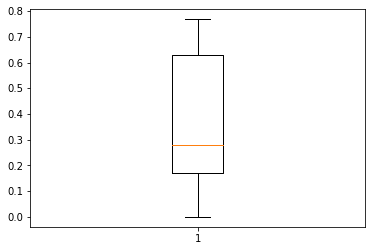

In [252]:
plt.boxplot(na_values)
plt.show()

<AxesSubplot:>

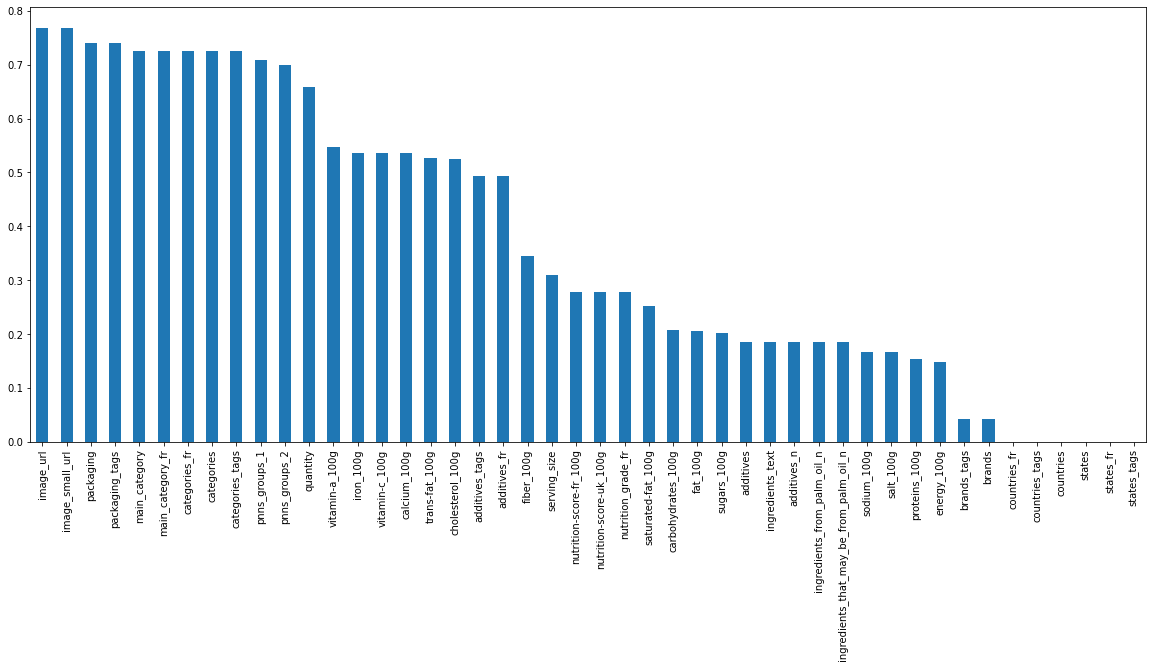

In [253]:
na_values.plot(kind='bar',figsize=(20,8))

In [254]:
df.drop(columns=['image_url','image_small_url', 'packaging','packaging_tags'], inplace=True)
# ces colonnes ne sont pas bien remplis ni pertinent pour l'etude

In [255]:
df.shape

(302987, 45)

## Valeurs manquantes par lignes
On efface les lignes dont les valeurs nutritionelles ne sont pas indiques

In [256]:
num=df.dtypes
num=num[num=='float64']
num=num.index
num

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [257]:
df.dropna(axis=0, how='all', subset=num, inplace=True)
df.shape

(272591, 45)

## Les valeurs dupliquees

In [258]:
df.shape

(272591, 45)

In [259]:
len(df['code'].unique())

272504

In [260]:
len(df['product_name'].unique())

197720

In [261]:
len(df['url'].unique())

272591

On remarque la presence de plusieurs formes de dupplication. 
### Duplication par code et nom:

In [262]:
df[df.duplicated(subset=['code','product_name'])].shape

(17, 45)

In [263]:
df=df.drop_duplicates(subset=['code','product_name'], keep='first')

### Duplication par nom du produits et ces valeurs nutritionelles

In [264]:
df[df.duplicated(subset=['product_name','proteins_100g','sodium_100g','nutrition-score-fr_100g'])].shape

(26830, 45)

In [265]:
to_drop=df[df.duplicated(subset=['product_name','proteins_100g','sodium_100g','nutrition-score-fr_100g'])].index

df=df.drop(index=to_drop)

df.shape

(245744, 45)

On a egalement des produits qui sont dupliques par toutes leurs valeurs nutritionelles mais ayant un nom de produit differents (pour la plupart c'est des colonnes de 0)

In [266]:
df[df.duplicated(subset=num)].shape

(49519, 45)

In [267]:
to_drop=df[df.duplicated(subset=num)].index
df=df.drop(index=to_drop)
df.shape

(196225, 45)

## Taux de valeurs manquantes apres ce netoyage

In [268]:
df.isna().mean().sort_values(ascending=False).head()

categories          0.707474
main_category       0.707474
main_category_fr    0.707474
categories_fr       0.707474
categories_tags     0.707474
dtype: float64

# Les categories
Nous avons 7 colonnes dans notre dataset concernant les categories : 'categories','categories_tags','categories_fr','pnns_groups_1','pnns_groups_2','main_category','main_category_fr'. Nous allons explorer leur contenu

In [269]:
categ=['categories','categories_tags','categories_fr',
       'pnns_groups_1','pnns_groups_2',
       'main_category','main_category_fr']

In [270]:
df[categ].isna().mean().sort_values()

pnns_groups_2       0.687104
pnns_groups_1       0.687996
categories          0.707474
categories_tags     0.707474
categories_fr       0.707474
main_category       0.707474
main_category_fr    0.707474
dtype: float64

### Remarques: 
Les colonnes **categories, categories_tags, categories_fr** contiennent les memes informations. Il est de meme pour les colonnes **main_category, main_category_fr**. La colonne **pnns_groups_2** possede le moins de valeurs manquantes. On commence donc par explorer cette colonne 
### pnns_groups_2

In [271]:
df['pnns_groups_2'].value_counts().head()

unknown               11693
One-dish meals         4788
Biscuits and cakes     3846
Sweets                 3082
Cereals                2988
Name: pnns_groups_2, dtype: int64

On homogenise les categories:

In [272]:
df['pnns_groups_2'].replace(regex=['legumes','vegetables','Legumes'], value='Vegetables', inplace=True)

In [273]:
df['pnns_groups_2'].replace({'fruits': 'Fruits', 'cereals' :'Cereals', 'nuts':'Nuts'}, inplace=True)
df['pnns_groups_2'].value_counts().head()

unknown               11693
One-dish meals         4788
Biscuits and cakes     3846
Sweets                 3082
Vegetables             3025
Name: pnns_groups_2, dtype: int64

### pnns_groups_1

In [274]:
df['pnns_groups_1'].value_counts()

unknown                    11693
Sugary snacks               9364
Milk and dairy products     6647
Cereals and potatoes        6449
Composite foods             5871
Beverages                   5630
Fish Meat Eggs              5110
Fruits and vegetables       3641
Fat and sauces              3448
Salty snacks                2251
fruits-and-vegetables        714
sugary-snacks                389
cereals-and-potatoes          15
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

On homogenise les categories:

In [275]:
df['pnns_groups_1'].replace({'salty-snacks':'Salty snacks', 'cereals-and-potatoes':'Cereals and potatoes','sugary-snacks':'Sugary snacks','fruits-and-vegetables':'Fruits and vegetables'}, inplace=True)
df['pnns_groups_1'].value_counts()

unknown                    11693
Sugary snacks               9753
Milk and dairy products     6647
Cereals and potatoes        6464
Composite foods             5871
Beverages                   5630
Fish Meat Eggs              5110
Fruits and vegetables       4355
Fat and sauces              3448
Salty snacks                2252
Name: pnns_groups_1, dtype: int64

### categories-tags
contient beaucoup d'informations sur le produits. Je la laisse de cote pour le moment

In [276]:
df['categories_tags'].value_counts().head()

en:sugary-snacks,en:biscuits-and-cakes,en:biscuits                                                                                                  685
en:sugary-snacks,en:chocolates,en:dark-chocolates                                                                                                   504
en:plant-based-foods-and-beverages,en:plant-based-foods,en:breakfasts,en:cereals-and-potatoes,en:cereals-and-their-products,en:breakfast-cereals    444
en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,en:chocolate-biscuits                                                                            407
en:salty-snacks,en:appetizers,en:crackers                                                                                                           397
Name: categories_tags, dtype: int64

### main_category
Contient des informations plus scpecifiques sur la categorie du produit mais on compte 3355 categories en plusieurs langues la pluparts des valeurs dans cette categorie ne sont pas pris en compte plaus qu'une dizaine de fois. A verifier en fonction des categories pnn1 et 2 qui semplent plus pertinents pour notre etude

In [277]:
df['main_category'].value_counts().shape

(2268,)

In [278]:
df['main_category'].value_counts()

en:groceries                          2195
en:beverages                          2182
en:plant-based-foods-and-beverages    2180
en:chocolates                         2173
en:canned-foods                       1904
                                      ... 
en:crackers-sans-gluten                  1
fr:creme-de-sarrasin                     1
fr:anchoiade                             1
fr:biscuits-pur-beurre                   1
fr:sauce-a-l-ail                         1
Name: main_category, Length: 2268, dtype: int64

In [279]:
main=df['main_category'].value_counts()
main.describe()

count    2268.000000
mean       25.309083
std       157.607454
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      2195.000000
Name: main_category, dtype: float64

Les categories utilisees plus que 20 fois dans le dataset:

In [280]:
main=main[main>20]
main.describe()

count     134.000000
mean      405.850746
std       517.984026
min        21.000000
25%        88.000000
50%       214.000000
75%       462.250000
max      2195.000000
Name: main_category, dtype: float64

<AxesSubplot:>

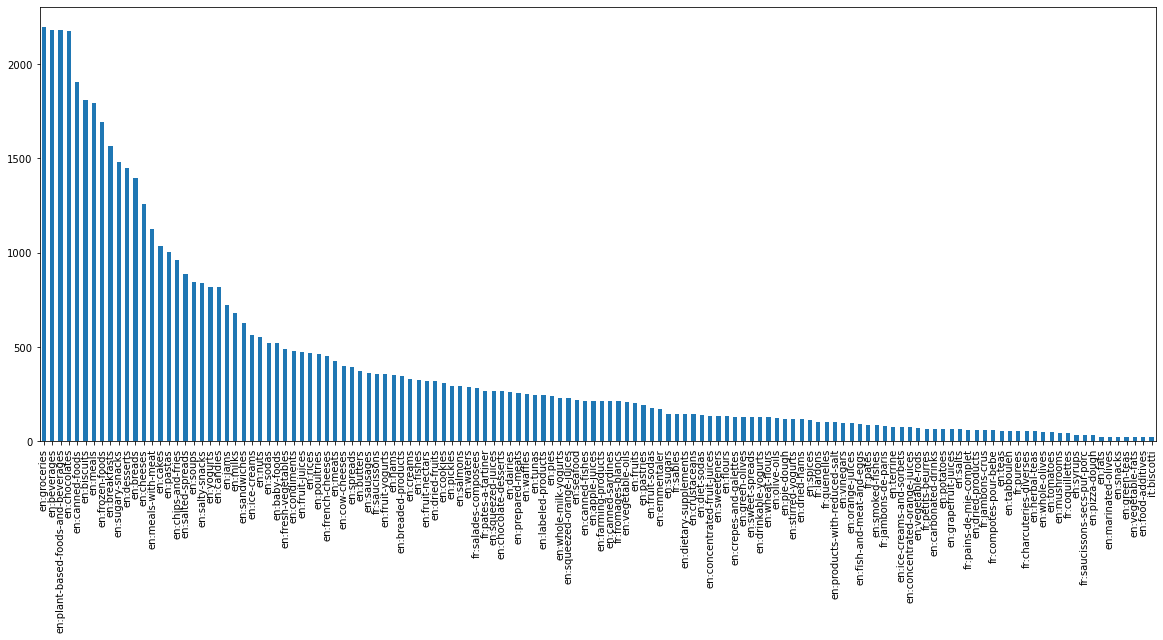

In [281]:
main.plot(kind='bar',figsize=(20,8))

# Etude des valeurs "unknown' dans les categories pnn
La categorisation la plus pertinentes pour ces produits est celle utilise dans les groupes pnns. Avant de commencer on changera toutes les valeurs Nan dans les categories pnn en **unknown**

In [282]:
df['pnns_groups_1'].fillna(value='unknown', inplace=True)
df['pnns_groups_2'].fillna(value='unknown', inplace=True)


In [283]:
groupe_categ=df.groupby(['pnns_groups_1'])

Je vais essayer d'ajouter les informations manquantes dans **pnns_groups_1** a partir des colonnes categories pour remedier aux **unknown** 

In [284]:
categNetoyer=groupe_categ.get_group('unknown')
categNetoyer=categNetoyer[~categNetoyer['main_category'].isna()]
categNetoyer.shape

(7871, 45)

Pour les valeurs unknown dans **pnns_groups_1** je regarde les informations contenus dans la variable **main_category**

In [285]:
categNetoyer['main_category'].value_counts().head()

en:baby-foods                         444
en:frozen-foods                       426
en:sugary-snacks                      376
en:plant-based-foods-and-beverages    348
en:spreads                            274
Name: main_category, dtype: int64

In [286]:
df['pnns_groups_1'].unique()

array(['unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'Milk and dairy products',
       'Salty snacks'], dtype=object)

Je recupere les informations de **main_category** en les ajoutant aux categories existantes dans **pnns_groups_1**

In [287]:
df.loc[df['main_category']=='en:beverages', 'pnns_groups_1']='Beverages'   
df.loc[df['main_category']=='en:spices', 'pnns_groups_1']='Spices'
df.loc[df['main_category']=='en:baby-foods', 'pnns_groups_1']='Baby food'
df.loc[df['main_category']=='en:frozen-foods', 'pnns_groups_1']='Frozen food'
df.loc[df['main_category']=='en:sugary-snacks', 'pnns_groups_1']='Sugary snacks'
df.loc[df['main_category']=='en:plant-based-foods-and-beverages', 'pnns_groups_1']='Plant based food and beverages'
df.loc[df['main_category']=='en:aliments-d-origine-vegetale', 'pnns_groups_1']='Plant based food and beverages'
df.loc[df['main_category']=='en:condiments', 'pnns_groups_1']='Condiments'
df.loc[df['main_category']=='en:spreads', 'pnns_groups_1']='Spreads'
df.loc[df['main_category']=='en:desserts', 'pnns_groups_1']='Desserts'
df.loc[df['main_category']=='en:groceries', 'pnns_groups_1']='Groceries'
df.loc[df['main_category']=='en:dietary-supplements', 'pnns_groups_1']='Dietary supplements'
df.loc[df['main_category']=='en:salted-spreads', 'pnns_groups_1']='Salted spreads'
df.loc[df['main_category']=='en:waffles', 'pnns_groups_1']='Desserts'
df.loc[df['main_category']=='en:crepes-and-galettes', 'pnns_groups_1']='Desserts'
df.loc[df['main_category']=='en:fish-and-meat-and-eggs', 'pnns_groups_1']='Fish Meat Eggs'
df.loc[df['main_category']=='en:canned-foods', 'pnns_groups_1']='Canned foods'

In [288]:
groupe_categ=df.groupby(['pnns_groups_1'])
categNetoyer=groupe_categ[categ].get_group('unknown')
categNetoyer=categNetoyer[~categNetoyer['main_category'].isna()]
categNetoyer['main_category'].value_counts().head()

en:chips-and-fries    138
en:dairies            138
en:sweeteners         135
en:pie-dough          120
en:green-olives       111
Name: main_category, dtype: int64

In [289]:
df['pnns_groups_2'].unique()

array(['unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'Soups', 'Cereals',
       'Fruits', 'Milk and yogurt', 'Fats', 'Non-sugared beverages',
       'Cheese', 'Chocolate products', 'Sandwich', 'Nuts',
       'Breakfast cereals', 'Appetizers',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'pastries', 'Alcoholic beverages', 'Dairy desserts',
       'Fruit nectars', 'Salty and fatty products', 'Tripe dishes'],
      dtype=object)

In [290]:
df.loc[df['main_category']=='en:salts', 'pnns_groups_1']='Salts'
df.loc[df['main_category']=='en:sweeteners', 'pnns_groups_1']='Sweeteners'
df.loc[df['main_category']=='en:dairies', 'pnns_groups_1']='Milk and dairy products'
df.loc[df['main_category']=='en:chips-and-fries', 'pnns_groups_1']='Salty snacks'
df.loc[df['main_category']=='en:green-olives', 'pnns_groups_1']='Appetizers'
df.loc[df['main_category']=='en:terrine', 'pnns_groups_1']='Fish Meat Eggs'
df.loc[df['main_category']=='en:pie-dough', 'pnns_groups_1']='Pizza pies and quiche'
df.loc[df['main_category']=='en:pickles', 'pnns_groups_1']='Appetizers'
df.loc[df['main_category']=='en:food-additives', 'pnns_groups_1']='Food additives'
df.loc[df['main_category']=='en:pies', 'pnns_groups_1']='Pizza pies and quiche'
df.loc[df['main_category']=='en:non-food-products', 'pnns_groups_1']='Non food products'
df.loc[df['main_category']=='en:flours', 'pnns_groups_1']='Cereals and potatoes'
df.loc[df['main_category']=='en:dried-products', 'pnns_groups_1']='Dried products'
df.loc[df['main_category']=='en:tabbouleh', 'pnns_groups_1']='Composite foods'
df.loc[df['main_category']=='fr:pates', 'pnns_groups_1']='Cereals and potatoes'
df.loc[df['main_category']=='en:salty-snacks', 'pnns_groups_1']='Salty snacks'
df.loc[df['main_category']=='en:whole-olives', 'pnns_groups_1']='Appetizers'
df.loc[df['main_category']=='en:pizza-dough', 'pnns_groups_1']='Pizza pies and quiche'


In [291]:
groupe_categ=df.groupby(['pnns_groups_1'])
categNetoyer=groupe_categ.get_group('unknown')
categNetoyer=categNetoyer[~categNetoyer['main_category'].isna()]
categNetoyer['main_category'].value_counts().head(10)

en:syrups              34
en:snacks              25
en:prepared-meats      23
en:breakfasts          22
it:biscotti            21
en:meals-with-meat     16
en:marinated-olives    13
en:thes-glaces         13
fr:pate                13
en:breaded-products    13
Name: main_category, dtype: int64

In [292]:
df.loc[df['main_category']=='en:syrups', 'pnns_groups_1']='Syrups'
df.loc[df['main_category']=='en:snacks', 'pnns_groups_1']='Snacks'
df.loc[df['main_category']=='en:breakfasts', 'pnns_groups_1']='Breakfast cereals'
df.loc[df['main_category']=='en:petit-dejeuners', 'pnns_groups_1']='Breakfast cereals'
df.loc[df['main_category']=='en:breakfast-biscuits', 'pnns_groups_1']='Breakfast cereals'
df.loc[df['main_category']=='en:thes-glaces', 'pnns_groups_1']='Beverages'
df.loc[df['main_category']=='it:biscotti', 'pnns_groups_1']='Snacks'

### Groupement par mots cles
Pour le reste des categories, j'essaie de grouper par mot cle dans les label de **main_category**

#### Beverages:

In [293]:
bev=['boisson','drink','juice','jus','water','cola']
for b in bev:
    beverages=categNetoyer[categNetoyer['main_category'].str.contains(b,case=False)]['code']
    df.loc[df['code'].isin(beverages), 'pnns_groups_1']='Beverages'

#### Sugary snacks

In [294]:
sug=['chocolat', 'cocoa','cookies', 'candy', 'bonbon']
for s in sug:
    Sugary_snacks=categNetoyer[categNetoyer['main_category'].str.contains(s,case=False)]['code']
    df.loc[df['code'].isin(Sugary_snacks),'pnns_groups_1']='Sugary snacks'

#### Desserts

In [295]:
dess=['cake', 'gateau','brownie', 'dessert', 'desert']
for d in dess:
    desserts=categNetoyer[categNetoyer['main_category'].str.contains('cake',case=False)]['code']
    df.loc[df['code'].isin(desserts),'pnns_groups_1']='Desserts'

#### Fish Meat Eggs

In [296]:
egg=['egg', 'oeuf', 'chicken', 'poulet', 'meat', 'viande', 'filet', 'steak', 'lamb', 'beef', 'pork', 'veau', 'boeuf', 'porc']
for eg in egg:
    eggs=categNetoyer[categNetoyer['main_category'].str.contains(eg,case=False)]['code']
    df.loc[df['code'].isin(eggs),'pnns_groups_1']='Fish Meat Eggs'

#### Fat and sauces

In [297]:
oil=['oil', 'huile','sauce', 'butter', 'beurre', 'dressing', 'ghee']
for o in oil:
    oils=categNetoyer[categNetoyer['main_category'].str.contains(o,case=False)]['code']
    df.loc[df['code'].isin(oils),'pnns_groups_1']='Fat and sauces'

#### Cereals and potatoes

In [298]:
cereal=['bread', 'pain', 'cereal', 'rice', 'riz', 'flour', 'farine', 'wrap', 'potato']
for c in cereal:
    bread=categNetoyer[categNetoyer['main_category'].str.contains(c,case=False)]['code']
    df.loc[df['code'].isin(bread),'pnns_groups_1']='Cereals and potatoes'


#### Milk and dairy products

In [299]:
dairy=['milk','lait','cheese','fromage', 'yogurt', 'yaourt' ]
for d in dairy:
    milk=categNetoyer[categNetoyer['main_category'].str.contains(d,case=False)]['code']
    df.loc[df['code'].isin(milk),'pnns_groups_1']='Milk and dairy products'

#### Pizza pies and quiche

In [300]:
pie=['pie', 'pizza', 'tarte', 'quiche']
for p in pie:
    pies=categNetoyer[categNetoyer['main_category'].str.contains(p,case=False)]['code']
    df.loc[df['code'].isin(pies),'pnns_groups_1']='Pizza pies and quiche'

#### Salty snacks

In [301]:
snacks=['chips', 'popcorn', 'peanuts']
for s in snacks:
    snack=categNetoyer[categNetoyer['main_category'].str.contains(s,case=False)]['code']
    df.loc[df['code'].isin(snack),'pnns_groups_1']='Salty snacks'

#### Condiments

In [302]:
condiments=['vinaigre', 'vinegar', 'ketshup', 'mustard', 'moutarde', 'mayo']
for c in condiments:
    condiment=categNetoyer[categNetoyer['main_category'].str.contains(c,case=False)]['code']
    df.loc[df['code'].isin(condiment),'pnns_groups_1']='Condiments'

#### Appetizers

In [303]:
apetizer=['olive']
for a in apetizer:
    aperitif=categNetoyer[categNetoyer['main_category'].str.contains(a,case=False)]['code']
    df.loc[df['code'].isin(aperitif),'pnns_groups_1']='Appetizers'

Apres ce premier netoyage :

In [304]:
df['pnns_groups_1'].value_counts().head()

unknown                    140911
Sugary snacks                9615
Milk and dairy products      6352
Beverages                    5741
Fish Meat Eggs               4875
Name: pnns_groups_1, dtype: int64

Je remet les memes valeurs regroupes de **unknown** dans le groupe **pnns_groups_2** aussi

In [305]:
df.loc[df['pnns_groups_2']=='unknown','pnns_groups_2']=df.loc[df['pnns_groups_2']=='unknown']['pnns_groups_1'].values

## Distribution des pnns groups

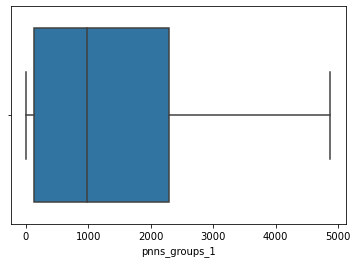

In [306]:
pnn1=df['pnns_groups_1'].value_counts()
sns.boxplot(data=pnn1, x=pnn1.index, showfliers=False)
plt.show()

In [307]:
pnn1.describe()

count        31.000000
mean       6329.838710
std       25081.680048
min           3.000000
25%         139.500000
50%         988.000000
75%        2292.500000
max      140911.000000
Name: pnns_groups_1, dtype: float64

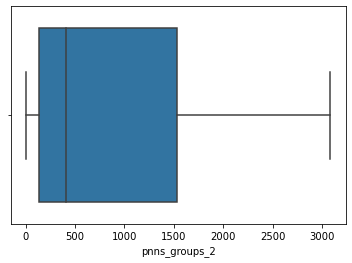

In [308]:
pnn2=df['pnns_groups_2'].value_counts()
sns.boxplot(data=pnn2, x=pnn2.index, showfliers=False)
plt.show()

In [309]:
pnn2.describe()

count        62.000000
mean       3164.919355
std       17814.154204
min           3.000000
25%         134.250000
50%         407.000000
75%        1526.750000
max      140909.000000
Name: pnns_groups_2, dtype: float64

### Conclusion:
Apres ce premier netoyage des categories on remarque aussi l'existance d'une categorie **Non food products** 

In [310]:
df[df['pnns_groups_2']=='Non food products'].head()

,code,url,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
170118,883929140886,http://world-fr.openfoodfacts.org/produit/0883...,Harry Potter & The Deathly Hallows Radcliffe /...,NaN,Harry's,harry-s,Non alimentaire,en:non-food-products,Non alimentaire,France,...,100.0,100.0,0.0,0.000000,NaN,NaN,NaN,NaN,-10.0,-10.0
222741,3286011051744,http://world-fr.openfoodfacts.org/produit/3286...,"Lingettes pocket pour visage et mains, biodégr...",NaN,Biolane,biolane,Open Beauty Facts,"en:non-food-products,en:open-beauty-facts","Non alimentaire,Open Beauty Facts",France,...,1.0,99.0,2.0,0.787402,NaN,NaN,NaN,NaN,18.0,18.0
315115,8714789913940,http://world-fr.openfoodfacts.org/produit/8714...,OBF,NaN,Sanex,sanex,"Non alimentaire,Open Beauty Facts","en:non-food-products,en:open-beauty-facts","Non alimentaire,Open Beauty Facts",France,...,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.0


Ces produits ne sont pas d'interet pour notre etude, je vais donc les enlever du dataset

In [311]:
df.drop(index=df[df['pnns_groups_2']=='Non food products'].index, inplace=True)

In [312]:
df.shape

(196222, 45)

# Les variables qualitatives a garder:
Les infos sur le code, nom du produit,  le pays de vente et la categorie 

In [313]:
obj=df.dtypes[df.dtypes=='object']

In [314]:
df[obj.index].isna().mean().sort_values(ascending=False)

main_category_fr      0.707484
main_category         0.707484
categories            0.707484
categories_tags       0.707484
categories_fr         0.707484
quantity              0.682808
additives_fr          0.417573
additives_tags        0.417573
serving_size          0.237298
nutrition_grade_fr    0.125394
additives             0.121281
ingredients_text      0.121189
brands_tags           0.014652
brands                0.014652
countries_fr          0.000311
countries_tags        0.000311
countries             0.000311
url                   0.000000
pnns_groups_1         0.000000
pnns_groups_2         0.000000
states                0.000000
states_tags           0.000000
states_fr             0.000000
product_name          0.000000
code                  0.000000
dtype: float64

En regardant la pertinence des indicateurs et leur taux de remplissafge, je garde les infos suivantes

In [315]:
Basic_info=df[['code','url','product_name','countries_tags','pnns_groups_1', 'pnns_groups_2' ]]

In [316]:
Basic_info.isna().mean()

code              0.000000
url               0.000000
product_name      0.000000
countries_tags    0.000311
pnns_groups_1     0.000000
pnns_groups_2     0.000000
dtype: float64

## Les informations sur les pays de vente

In [317]:
Basic_info['countries_tags'].value_counts()

en:united-states                                                       116428
en:france                                                               55840
en:switzerland                                                           7916
en:germany                                                               4017
en:spain                                                                 2738
                                                                        ...  
en:france,en:french-polynesia,en:spain                                      1
en:france,en:greece,en:spain                                                1
en:algeria,en:belgium,en:canada,en:france,en:morocco,en:switzerland         1
en:belgium,en:france,en:guadeloupe                                          1
en:china,en:hong-kong                                                       1
Name: countries_tags, Length: 491, dtype: int64

In [318]:
pays=Basic_info['countries_tags'].value_counts()
pays.describe()

count       491.000000
mean        399.513238
std        5835.596343
min           1.000000
25%           1.000000
50%           1.000000
75%           5.000000
max      116428.000000
Name: countries_tags, dtype: float64

<AxesSubplot:>

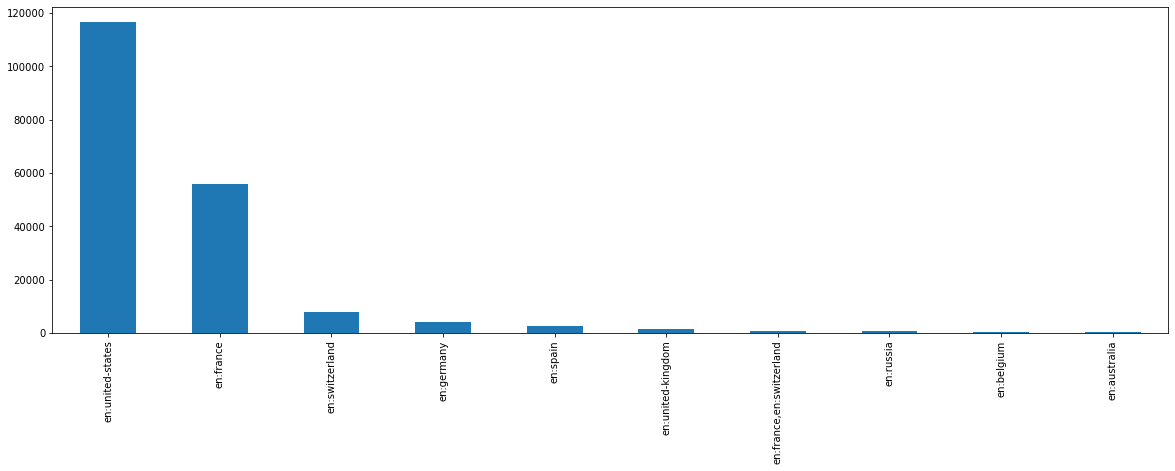

In [319]:
pays=pays[pays>400]
pays.plot(kind='bar', figsize=(20, 6))

il y a des produits commercialises dans plusieurs pays, mais la majorite des informations sont pour les produits commercialise au etats-unis puis en france

In [320]:
(df['countries_tags'].str.contains('france')== True).sum()

58632

# Les donnees quantitatives

Ces donnees quantitatives vont nous aider a classifier nos produits selon leur valeurs nutritionnelles. Il existe beaucoup de valeurs manquantes dans ce jeu de donnees.

In [321]:
types=df.dtypes
types=types[types=='float64']
types
quant_df=df[types.index]

In [322]:
df.shape

(196222, 45)

In [323]:
quant_df.isna().mean().sort_values(ascending=False).head(10)

vitamin-a_100g                 0.497080
trans-fat_100g                 0.486750
vitamin-c_100g                 0.485267
iron_100g                      0.484854
calcium_100g                   0.481735
cholesterol_100g               0.479931
fiber_100g                     0.212290
nutrition-score-fr_100g        0.125394
nutrition-score-uk_100g        0.125394
ingredients_from_palm_oil_n    0.121189
dtype: float64

In [324]:
quant_df.median().sort_values()

ingredients_from_palm_oil_n                   0.00000
ingredients_that_may_be_from_palm_oil_n       0.00000
trans-fat_100g                                0.00000
cholesterol_100g                              0.00000
vitamin-c_100g                                0.00000
vitamin-a_100g                                0.00000
iron_100g                                     0.00109
calcium_100g                                  0.03800
sodium_100g                                   0.25700
salt_100g                                     0.65278
additives_n                                   1.00000
fiber_100g                                    1.50000
saturated-fat_100g                            2.00000
proteins_100g                                 5.17000
sugars_100g                                   6.15000
fat_100g                                      6.30000
nutrition-score-fr_100g                      10.00000
nutrition-score-uk_100g                      10.00000
carbohydrates_100g          

In [325]:
quant_df.var().sort_values()

vitamin-a_100g                             7.484597e-03
ingredients_from_palm_oil_n                2.416796e-02
iron_100g                                  3.892475e-02
ingredients_that_may_be_from_palm_oil_n    8.773336e-02
cholesterol_100g                           1.314959e-01
trans-fat_100g                             2.887688e+00
vitamin-c_100g                             6.699544e+00
additives_n                                6.802256e+00
calcium_100g                               1.522527e+01
saturated-fat_100g                         5.879271e+01
proteins_100g                              6.857908e+01
nutrition-score-fr_100g                    7.965254e+01
nutrition-score-uk_100g                    8.216658e+01
fiber_100g                                 2.090217e+02
fat_100g                                   2.449406e+02
sugars_100g                                4.648443e+02
carbohydrates_100g                         8.286194e+02
sodium_100g                                3.418

In [326]:
quant_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
additives_n,172442.0,2.098740,2.608113,0.00000,0.00000,1.00000,3.000000,3.100000e+01
ingredients_from_palm_oil_n,172442.0,0.024136,0.155460,0.00000,0.00000,0.00000,0.000000,2.000000e+00
ingredients_that_may_be_from_palm_oil_n,172442.0,0.065471,0.296198,0.00000,0.00000,0.00000,0.000000,6.000000e+00
energy_100g,195058.0,1146.911926,7436.371671,0.00000,418.00000,1084.00000,1674.000000,3.251373e+06
fat_100g,178715.0,12.454317,15.650578,0.00000,0.50000,6.30000,20.000000,7.142900e+02
saturated-fat_100g,176837.0,5.031986,7.667640,0.00000,0.00000,2.00000,7.140000,5.500000e+02
trans-fat_100g,100711.0,0.085287,1.699320,-3.57000,0.00000,0.00000,0.000000,3.690000e+02
cholesterol_100g,102049.0,0.019762,0.362624,0.00000,0.00000,0.00000,0.023000,9.523800e+01
carbohydrates_100g,178690.0,32.413654,28.785749,0.00000,7.00000,23.08000,57.140000,2.916670e+03
sugars_100g,185534.0,15.632526,21.560249,-17.86000,1.50000,6.15000,24.000000,3.520000e+03


En regardant les informations sur les valeurs nutritionelles, je remarque qu'il y a des indicateurs non representatives (plus de 50% des donnees ont une valeurs 0) telque **ingredients_from_palm_oil_n**, **vitamin-a_100g	**, **vitamin-c_100**
Il y a aussi des indicateurs avec des valeurs aberrantes tel que **energy_100g**, **proteins_100g**, **salt_100g**...

# Indicateurs quantitatives a garder

In [395]:
colToKeep=['code', 'product_name', 'countries_tags', 'pnns_groups_1','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'nutrition-score-fr_100g']

In [396]:
Indicateurs=df[colToKeep]

## Description du dataset Indicateurs

In [397]:
Indicateurs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,195058.0,1146.911926,7436.371671,0.00,418.00000,1084.000,1674.000000,3251373.000
fat_100g,178715.0,12.454317,15.650578,0.00,0.50000,6.300,20.000000,714.290
saturated-fat_100g,176837.0,5.031986,7.667640,0.00,0.00000,2.000,7.140000,550.000
cholesterol_100g,102049.0,0.019762,0.362624,0.00,0.00000,0.000,0.023000,95.238
carbohydrates_100g,178690.0,32.413654,28.785749,0.00,7.00000,23.080,57.140000,2916.670
sugars_100g,185534.0,15.632526,21.560249,-17.86,1.50000,6.150,24.000000,3520.000
fiber_100g,154566.0,2.895138,14.457582,-6.70,0.00000,1.500,3.600000,5380.000
proteins_100g,193961.0,7.239226,8.281249,-800.00,1.20000,5.170,10.000000,430.000
sodium_100g,190324.0,0.833538,58.467561,0.00,0.03937,0.257,0.551181,25320.000
nutrition-score-fr_100g,171617.0,9.311991,8.924827,-15.00,1.00000,10.000,16.000000,40.000


### Valeurs manquantes

In [398]:
Indicateurs.isna().mean().sort_values(ascending=False)

cholesterol_100g           0.479931
fiber_100g                 0.212290
nutrition-score-fr_100g    0.125394
saturated-fat_100g         0.098791
carbohydrates_100g         0.089348
fat_100g                   0.089220
sugars_100g                0.054469
sodium_100g                0.030058
proteins_100g              0.011523
energy_100g                0.005932
countries_tags             0.000311
code                       0.000000
product_name               0.000000
pnns_groups_1              0.000000
dtype: float64

### Correlations

In [399]:
Indicateurs.corr().style.background_gradient()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.076531,0.065544,0.005130,0.055822,0.057198,0.076412,0.040343,-0.000309,0.059261
fat_100g,0.076531,1.000000,0.717624,0.023855,-0.027799,0.001492,0.143709,0.248408,-0.004012,0.579791
saturated-fat_100g,0.065544,0.717624,1.000000,0.040370,0.007233,0.203348,0.189558,0.164685,-0.002501,0.619396
cholesterol_100g,0.005130,0.023855,0.040370,1.000000,-0.034021,-0.015060,-0.023308,0.045317,0.132686,0.029358
carbohydrates_100g,0.055822,-0.027799,0.007233,-0.034021,1.000000,0.642844,0.290008,-0.095224,0.001135,0.306817
sugars_100g,0.057198,0.001492,0.203348,-0.015060,0.642844,1.000000,0.404215,-0.178920,0.001423,0.449032
fiber_100g,0.076412,0.143709,0.189558,-0.023308,0.290008,0.404215,1.000000,0.203761,0.000856,-0.034935
proteins_100g,0.040343,0.248408,0.164685,0.045317,-0.095224,-0.178920,0.203761,1.000000,-0.002138,0.090881
sodium_100g,-0.000309,-0.004012,-0.002501,0.132686,0.001135,0.001423,0.000856,-0.002138,1.000000,0.007273
nutrition-score-fr_100g,0.059261,0.579791,0.619396,0.029358,0.306817,0.449032,-0.034935,0.090881,0.007273,1.000000


Les resultats des correlations ne semblent pas tres satisfaisants, probablement a cause des donnees erronees. POur notre etude nous serons interesses par les produits adequat pour un regime plus sain dans le cadre d'un meilleur comportement alimentaire. Nous seront donc interesse notemment par la reduction de l'apport en matieres grasse et glucides tout en examinant les apport en proteine, fibre, sucre et sel pour decider sur nos recommendations de produits plus sain. Nous garderons donc les info suivantes:

# Etude des valeurs aberrantes
Nous allons examiner les valeurs aberrantes des variables du dataset Indicateurs
## Energy
L'energie par 100g peut etre calculer a partir des proteine, fat et carbohydrates en kcal puis multiplie par 4.1868 pour avoir l'information en Kj, mais avant de la calcule je vais netoyer les valeurs aberrantes dans les composantes de l'energie

### Carbohydrates:

In [400]:
Indicateurs[Indicateurs['carbohydrates_100g']>110]

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
71000,70552801110,"Toaster Pastries, Strawberry",en:united-states,unknown,2615.0,NaN,6.250,0.0,209.38,46.88,3.1,6.25,0.59400,25.0
111566,01364008,Tomato Ketchup,en:united-states,Groceries,2510.0,0.588,0.588,0.0,136.00,134.00,0.0,7.06,0.00417,17.0
119783,632432968018,Naturally Caffeinated Pure Empower Mint Dietar...,en:united-states,unknown,837.0,NaN,NaN,NaN,120.00,NaN,NaN,NaN,NaN,NaN
133567,720118181216,Mango Jalapeno,en:united-states,unknown,1941.0,0.000,0.000,NaN,125.00,110.71,7.1,NaN,NaN,NaN
155609,838619000254,Beurre d'érable,en:france,unknown,1390.0,0.000,0.000,NaN,164.00,72.70,NaN,0.00,NaN,NaN
155803,840228113270,"Tamarind Juice With Nata De Coco, Tamarind",en:united-states,unknown,NaN,0.000,NaN,NaN,2916.67,166.67,250.0,NaN,58.00000,NaN
245311,3596710288755,mini choux goût fromage de chèvre - poivre,en:france,Salty snacks,18700.0,380.000,210.000,NaN,190.00,22.70,0.0,0.00,3.67000,35.0
317635,8935000901649,Banane sèche,en:france,Fruits and vegetables,1259.0,0.000,0.000,NaN,139.00,41.50,0.0,5.00,0.00000,4.0


In [401]:
Indicateurs.drop(index=[155803,245311,234726], inplace=True)

In [402]:
Indicateurs.loc[Indicateurs['carbohydrates_100g']>110,'carbohydrates_100g']=np.nan

In [403]:
Indicateurs.loc[Indicateurs['carbohydrates_100g']>100,'carbohydrates_100g']=100

In [404]:
Indicateurs['carbohydrates_100g'].describe()

count    178681.000000
mean         32.392175
std          27.954045
min           0.000000
25%           7.000000
50%          23.080000
75%          57.140000
max         100.000000
Name: carbohydrates_100g, dtype: float64

### Fat

In [405]:
Indicateurs['fat_100g'].describe()

count    178712.000000
mean         12.452109
std          15.626234
min           0.000000
25%           0.500000
50%           6.300000
75%          20.000000
max         714.290000
Name: fat_100g, dtype: float64

In [406]:
Indicateurs.loc[Indicateurs['fat_100g']>100]

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
112681,0201203040026,Premium Extra Virgin Olive Oil,en:united-states,unknown,110579.0,714.29,100.0,0.0,NaN,0.0,0.0,0.0,0.000000,20.0
303101,8005305900255,Ekstra Jomfru Olivenolie,en:denmark,Fat and sauces,3737.0,101.00,15.0,NaN,0.0,0.0,NaN,0.0,0.000000,11.0
305054,8032942610032,Graine de couscous moyen,en:france,Plant based food and beverages,1482.0,105.00,0.3,NaN,70.0,2.5,NaN,12.0,0.003937,-1.0


In [407]:
Indicateurs.loc[Indicateurs['code']=='8032942610032', 'fat_100g']=np.nan

In [408]:
Indicateurs.loc[Indicateurs['fat_100g']>100,'fat_100g']=100

In [409]:
Indicateurs['fat_100g'].describe()

count    178711.000000
mean         12.448148
std          15.537639
min           0.000000
25%           0.500000
50%           6.300000
75%          20.000000
max         100.000000
Name: fat_100g, dtype: float64

### Protein

In [410]:
Indicateurs['proteins_100g'].describe()

count    193959.000000
mean          7.239249
std           8.281273
min        -800.000000
25%           1.200000
50%           5.170000
75%          10.000000
max         430.000000
Name: proteins_100g, dtype: float64

In [411]:
Indicateurs.loc[Indicateurs['proteins_100g']<0,'proteins_100g']=np.nan

In [412]:
Indicateurs.loc[Indicateurs['proteins_100g']>100]

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
313506,8710573641501,"Nusco, Chocolate Spread, Chocolate",en:united-states,unknown,231199.0,NaN,550.0,NaN,NaN,3520.0,5380.0,430.0,0.004,25.0


In [413]:
Indicateurs.drop(index=313506, inplace=True)

In [414]:
Indicateurs['proteins_100g'].describe()

count    193955.000000
mean          7.243903
std           7.935520
min           0.000000
25%           1.200000
50%           5.170000
75%          10.000000
max         100.000000
Name: proteins_100g, dtype: float64

## Calcul de l'energie

In [415]:
Indicateurs['energie-calculee']=4*Indicateurs['carbohydrates_100g']+9*Indicateurs['fat_100g']+4*Indicateurs['proteins_100g']
Indicateurs['energie-calculee']=4.1868*Indicateurs['energie-calculee']

In [416]:
Indicateurs[['energy_100g','energie-calculee']].describe()

,energy_100g,energie-calculee
count,1.950550e+05,176960.000000
mean,1.145628e+03,1129.146805
std,7.418054e+03,764.865075
min,0.000000e+00,0.000000
25%,4.180000e+02,418.680000
50%,1.084000e+03,1091.666232
75%,1.674000e+03,1686.359304
max,3.251373e+06,6001.191648


In [417]:
Indicateurs['difference']=Indicateurs['energy_100g']-Indicateurs['energie-calculee']
Indicateurs['difference'].describe()

count    1.766120e+05
mean     1.559307e+01
std      7.751754e+03
min     -4.186926e+03
25%     -2.093457e+01
50%      1.676800e+00
75%      2.336396e+01
max      3.250140e+06
Name: difference, dtype: float64

<AxesSubplot:xlabel='difference'>

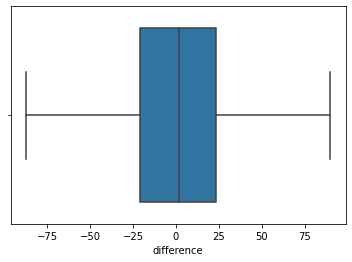

In [418]:
sns.boxplot(data=Indicateurs, x='difference', showfliers=False)

<AxesSubplot:xlabel='difference'>

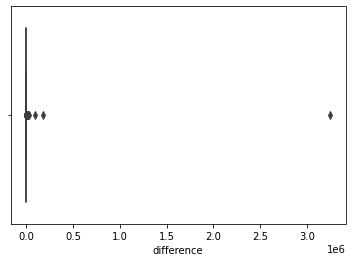

In [419]:
sns.boxplot(data=Indicateurs, x='difference')

On remarque la presence de valeurs aberrantes avec des valeurs importantes, cela est probablement du a des informations erronees dans les composantes de calcul de l'energi calculee ou a une valeur errone de l'energy_1009 (Kcal a la place de Kj)

Je prend en compte que le vrai calcule de l'energie prend en compte egalement la presence de fibres et d'autres composantes qui peuvent alterer faiblement le calcul que j'ai fait de celui de l'energie precise.  Je regarde les produits dont cette difference est superieure a 200.

Les produits dont la valeur **energy_100g** > **energie-calculee**:

In [420]:
Indicateurs.loc[Indicateurs['difference']>200].shape

(3549, 16)

Les produits dont la valeur **energy_100g** <**energie-calculee**:

In [421]:
Indicateurs.loc[Indicateurs['difference']<-200].shape

(5505, 16)

In [422]:
Indicateurs.loc[abs(Indicateurs['difference'])>200].shape

(9054, 16)

In [423]:
Indicateurs.loc[Indicateurs['difference'].isna()].shape

(19606, 16)

## On regarde la variable energy_100g

<AxesSubplot:xlabel='energy_100g'>

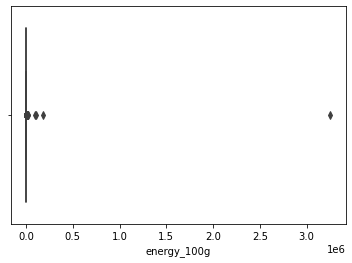

In [424]:
sns.boxplot(data=Indicateurs, x='energy_100g')

<AxesSubplot:xlabel='energy_100g'>

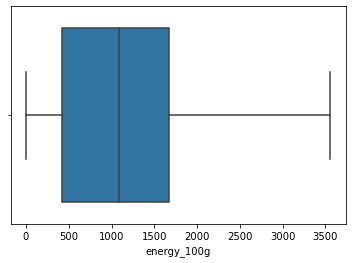

In [425]:
sns.boxplot(data=Indicateurs, x='energy_100g', showfliers=False)

In [426]:
composantes=['energy_100g','fat_100g','carbohydrates_100g', 'proteins_100g', 'difference']
Indicateurs.loc[(Indicateurs['energy_100g']>3500) & (abs(Indicateurs['difference'])>200)][composantes] .describe()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,difference
count,9.500000e+01,95.000000,95.000000,95.000000,9.500000e+01
mean,4.286814e+04,41.766526,31.398421,9.942421,4.060198e+04
std,3.333217e+05,40.674497,33.578182,14.996695,3.334522e+05
min,3.515000e+03,0.000000,0.000000,0.000000,-1.591600e+03
25%,3.751000e+03,0.200000,0.000000,0.000000,2.917361e+02
50%,4.335000e+03,29.500000,21.000000,3.510000,2.927752e+03
75%,6.826000e+03,87.085000,55.400000,13.995000,5.577000e+03
max,3.251373e+06,100.000000,100.000000,66.670000,3.250140e+06


On voit bien ici qu'il y a plusieurs problemes a verifier.
On commence par rectifier les valeurs aberrantes dans energy.

Parmi ces valeurs je regarde celles ou la difference est superieur a 200 (dans la varible problem)

In [427]:
a_remplacer=Indicateurs.loc[(Indicateurs['energy_100g']>3500) & (Indicateurs['difference']>200)& (Indicateurs['fat_100g']!=0)& (Indicateurs['carbohydrates_100g']!=0) & (Indicateurs['proteins_100g']!=0)]
a_remplacer.head()

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
14399,18894004806,Honey Peanuts,en:united-states,unknown,4335.0,82.14,10.71,0.000,21.43,17.86,7.1,21.43,0.232,20.0,3812.918760,522.081240
35308,38233241334,Lemon Cake,en:united-states,unknown,13213.0,12.28,2.63,0.053,45.61,29.82,0.0,3.51,0.281,21.0,1285.347600,11927.652400
46967,41390030512,Instant Aka Miso Soup,en:united-states,unknown,14644.0,10.00,0.00,0.000,40.00,0.00,0.0,20.00,7.900,20.0,1381.644000,13262.356000
66156,56141003103,"Crema Salvadorena, Soft Blend Dairy Spread",en:united-states,unknown,10966.0,24.14,13.79,0.086,6.90,6.90,0.0,3.45,0.552,27.0,1082.957688,9883.042312
77326,71725750808,"Flagstone Foods, Sweetened Toasted Coconut Cri...",en:united-states,unknown,3565.0,59.26,55.56,0.000,29.63,22.22,3.7,7.41,0.185,21.0,2853.304200,711.695800


Pour ces produits la valeurs **energy_100g** est plus grande que la valeur calculee, je remplace par la valeur calculee

In [428]:
Indicateurs.loc[Indicateurs['code'].isin(a_remplacer), 'energy_100g']=Indicateurs.loc[Indicateurs['code'].isin(a_remplacer),'energie-calculee']

On regarde maintenant les produits donc la difference n'est pas indique par manques de valeurs dans l'un des 3 compossants du calcul de l'energie

In [429]:
Indicateurs.loc[(Indicateurs['difference'].isna()) & (Indicateurs['energy_100g']>5000)&(Indicateurs['fat_100g']<80),'energy_100g']=np.nan

Pour ces produits on n'a pas de comparaison, on supposera donc que la valeur de l'energy est aberrante et la remplcera par NaN

In [430]:
Indicateurs.loc[(Indicateurs['difference'].isna()) & (Indicateurs['energy_100g']>5000) & (Indicateurs['fat_100g'].isna()),'energy_100g']=np.nan
Indicateurs.loc[(Indicateurs['difference'].isna()) & (Indicateurs['energy_100g']>5000) & (Indicateurs['fat_100g']<10),'energy_100g']=np.nan

In [433]:
Indicateurs.loc[(Indicateurs['difference']>300) & (Indicateurs['energy_100g']>5000)& (Indicateurs['fat_100g'].isna()),'energy_100g']=np.nan
Indicateurs.loc[(Indicateurs['difference']>300) & (Indicateurs['energy_100g']>5000)& (Indicateurs['fat_100g']<10),'energy_100g']=np.nan

In [434]:
Indicateurs['difference']=Indicateurs['energy_100g']-Indicateurs['energie-calculee']
Indicateurs.loc[(Indicateurs['energy_100g']>3500) & (abs(Indicateurs['difference'])>300)& (Indicateurs['fat_100g']<70),'energy_100g']=Indicateurs.loc[(Indicateurs['energy_100g']>3500) & (abs(Indicateurs['difference'])>300) & (Indicateurs['fat_100g']<70),'energie-calculee']

In [435]:
def update_energy():
    Indicateurs['energie-calculee']=4*Indicateurs['carbohydrates_100g']+9*Indicateurs['fat_100g']+4*Indicateurs['proteins_100g']
    Indicateurs['energie-calculee']=4.1868*Indicateurs['energie-calculee']
    Indicateurs['difference']=Indicateurs['energy_100g']-Indicateurs['energie-calculee']
    

In [436]:
update_energy()

In [437]:
Indicateurs[abs(Indicateurs['difference']>300)][composantes].describe()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,difference
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1598.029883,7.548899,31.283893,5.184403,702.836451
std,759.129102,14.776708,31.797243,9.533301,554.489185
min,326.000000,0.000000,0.000000,0.000000,300.337760
25%,1046.000000,0.000000,0.000000,0.000000,366.726163
50%,1629.500000,0.000000,20.000000,0.000000,477.678586
75%,2092.000000,9.455000,54.090000,7.000000,852.464156
max,15481.000000,100.000000,100.000000,80.000000,11712.880000


In [438]:
Indicateurs.drop(index=[112681] , inplace=True)

In [440]:
Indicateurs.loc[(Indicateurs['energy_100g']>4000) & (Indicateurs['fat_100g'].isna()), 'energy_100g']=np.nan

In [441]:
Indicateurs[(Indicateurs['energie-calculee']>4000) & (abs(Indicateurs['difference'])>1000)]

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
9401,11246180555,Horseradish Sauce,en:united-states,unknown,1674.0,100.00,0.0,0.000,20.00,0.00,0.0,0.00,0.600000,10.0,4103.064000,-2429.064000
130920,711844110618,Sweet soy sauce - Kecap Manis,"en:australia,en:united-states",unknown,0.0,66.67,0.0,0.000,100.00,80.00,66.7,0.00,2.100000,15.0,4186.925604,-4186.925604
132068,715483004239,Dallies Tombstones & Sprinkles,en:united-states,unknown,1674.0,100.00,0.0,0.000,80.00,60.00,0.0,0.00,0.000000,14.0,5107.896000,-3433.896000
154539,829364100023,"Diebergs Markets, Fruit Slices Candy",en:united-states,unknown,1531.0,87.80,0.0,0.000,87.80,56.10,0.0,0.00,0.061000,14.0,4778.813520,-3247.813520
154544,829364100337,"Diebergs Markets, Spearmint Leaves Candy",en:united-states,unknown,1531.0,87.80,0.0,0.000,87.80,58.54,0.0,0.00,0.000000,14.0,4778.813520,-3247.813520
154545,829364100344,"Markets, Spice Drops Candy",en:united-states,unknown,1427.0,82.93,0.0,0.000,82.93,56.10,0.0,0.00,0.000000,14.0,4513.747212,-3086.747212
154551,829364101198,Butterscotch Buttons,en:united-states,unknown,1628.0,66.67,0.0,0.000,94.44,66.67,0.0,0.00,0.278000,17.0,4093.811172,-2465.811172
154565,829364111197,"Markets, Soft Cherry Candy Balls",en:united-states,unknown,1674.0,100.00,0.0,0.000,100.00,100.00,0.0,0.00,0.000000,14.0,5442.840000,-3768.840000
155379,835976005427,"The Candy Tree, Gum Drop Candy",en:united-states,unknown,1452.0,97.67,0.0,NaN,86.05,62.79,NaN,0.00,0.037000,14.0,5121.419364,-3669.419364
156683,846548042726,California Mix,en:united-states,unknown,1644.0,89.29,0.0,0.000,67.86,53.57,3.6,7.14,0.036000,9.0,4620.594348,-2976.594348


Ici la valeur aberrante est surement le fat, on remplace par nan

In [443]:
Indicateurs.loc[(Indicateurs['energie-calculee']>4000) & (abs(Indicateurs['difference'])>1000),'fat_100g']=np.nan

In [444]:
update_energy()

<AxesSubplot:xlabel='energy_100g'>

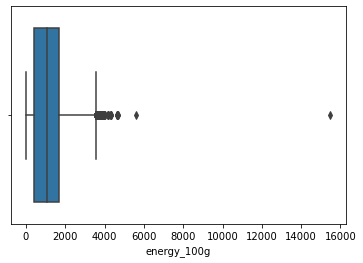

In [445]:
sns.boxplot(data=Indicateurs, x='energy_100g')

In [446]:
Indicateurs['energy_100g'].describe()

count    194966.000000
mean       1123.973241
std         756.176383
min           0.000000
25%         418.000000
50%        1084.000000
75%        1674.000000
max       15481.000000
Name: energy_100g, dtype: float64

## Energie en fonction de ses composantes

In [447]:
Indicateurs[Indicateurs['difference']>300][composantes].describe()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,difference
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1598.029883,7.548899,31.283893,5.184403,702.836451
std,759.129102,14.776708,31.797243,9.533301,554.489185
min,326.000000,0.000000,0.000000,0.000000,300.337760
25%,1046.000000,0.000000,0.000000,0.000000,366.726163
50%,1629.500000,0.000000,20.000000,0.000000,477.678586
75%,2092.000000,9.455000,54.090000,7.000000,852.464156
max,15481.000000,100.000000,100.000000,80.000000,11712.880000


### Carbohydrates

In [448]:
Indicateurs.loc[(Indicateurs['carbohydrates_100g']>98)&(Indicateurs['energy_100g']<1000),'carbohydrates_100g']=np.nan

In [449]:
update_energy()

In [450]:
Indicateurs.loc[(Indicateurs['carbohydrates_100g']==0)&(Indicateurs['difference']>300),'energy_100g']=Indicateurs.loc[(Indicateurs['carbohydrates_100g']==0)&(Indicateurs['difference']>300),'energie-calculee']

In [451]:
update_energy()

In [452]:
Indicateurs[Indicateurs['difference']>300][['energy_100g','fat_100g','carbohydrates_100g', 'proteins_100g']].describe()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
count,1377.000000,1377.000000,1377.000000,1377.000000
mean,1684.390704,7.547442,42.575174,5.698963
std,590.038682,12.418688,29.919481,8.890305
min,335.000000,0.000000,0.014000,0.000000
25%,1279.000000,0.000000,16.670000,0.000000
50%,1674.000000,0.100000,40.000000,0.900000
75%,2092.000000,10.800000,66.670000,7.840000
max,4335.000000,82.140000,100.000000,57.140000


In [453]:
Indicateurs['difference'].describe()

count    176433.000000
mean         -7.537803
std         126.860678
min       -3768.120000
25%         -20.786248
50%           1.526240
75%          22.975556
max        2725.266960
Name: difference, dtype: float64

### Indicateur difference

Je regarde le cas ou la valeur calculee est inferieur a la valeur affiche, cela est probablement du au fait que fat, carb ou protein est affichee comme 0 a la place de Nan. Je rectifie cela

In [454]:
composantes=['fat_100g', 'carbohydrates_100g', 'proteins_100g']
for i in composantes:
    Indicateurs.loc[(Indicateurs['difference']>300) & (Indicateurs[i]==0), i]=np.nan

In [455]:
update_energy()

In [456]:
Indicateurs['difference'].describe()

count    175652.000000
mean         -9.891705
std         120.693226
min       -3768.120000
25%         -21.037026
50%           1.443900
75%          22.534500
max        2725.266960
Name: difference, dtype: float64

In [457]:
 Indicateurs.loc[(Indicateurs['difference']>300)][composantes].describe()

,fat_100g,carbohydrates_100g,proteins_100g
count,596.000000,596.000000,596.000000
mean,13.522126,28.371921,9.838577
std,13.159143,22.339051,8.106092
min,0.010000,0.014000,0.004000
25%,3.055000,7.975000,3.780000
50%,9.045000,23.245000,7.140000
75%,21.082500,46.527500,14.000000
max,82.140000,95.650000,57.140000


Pour tous ces produits on a des valeurs acceptables des composantes de l'energie, nous remplacerons donc **energy_100g** par la valeur calculee

In [459]:
Indicateurs.loc[(Indicateurs['difference']>300), 'energy_100g']=Indicateurs.loc[(Indicateurs['difference']>300), 'energie-calculee']

In [460]:
update_energy()
Indicateurs.loc[Indicateurs['difference']>300]

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference


On regarde maintenant les produits dont la valeur calculee est superieur a **energy_100g**

In [461]:
Indicateurs.loc[Indicateurs['difference']<-300][composantes].describe()

,fat_100g,carbohydrates_100g,proteins_100g
count,2713.000000,2713.000000,2713.000000
mean,17.035748,52.349753,10.086043
std,19.836531,26.341130,12.690145
min,0.000000,0.000000,0.000000
25%,0.000000,33.330000,0.000000
50%,10.000000,55.360000,6.670000
75%,30.000000,70.200000,15.000000
max,100.000000,100.000000,100.000000


In [462]:
Indicateurs.loc[(Indicateurs['difference']<-300), 'energy_100g']=Indicateurs.loc[(Indicateurs['difference']<-300), 'energie-calculee']

In [463]:
update_energy()

In [464]:
Indicateurs['energy_100g'].describe()

count    194966.000000
mean       1128.008976
std         757.755287
min           0.000000
25%         420.000000
50%        1096.000000
75%        1674.000000
max        6001.191648
Name: energy_100g, dtype: float64

In [465]:
Indicateurs.corr()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
energy_100g,1.000000,0.780950,0.572786,0.005885,0.578629,0.354982,0.284561,0.298069,-0.002899,0.645859,0.996570,-0.121149
fat_100g,0.780950,1.000000,0.718546,0.024089,-0.025721,0.003128,0.150590,0.260557,-0.003965,0.586063,0.788276,-0.219883
saturated-fat_100g,0.572786,0.718546,1.000000,0.040397,0.007016,0.148581,0.024209,0.146571,-0.002547,0.629539,0.588684,-0.122371
cholesterol_100g,0.005885,0.024089,0.040397,1.000000,-0.034022,-0.015070,-0.023308,0.045283,0.132686,0.029347,0.005738,0.000967
carbohydrates_100g,0.578629,-0.025721,0.007016,-0.034022,1.000000,0.659708,0.264138,-0.096360,0.000491,0.307500,0.572903,-0.033862
sugars_100g,0.354982,0.003128,0.148581,-0.015070,0.659708,1.000000,-0.002131,-0.251710,0.001510,0.488583,0.364727,-0.058953
fiber_100g,0.284561,0.150590,0.024209,-0.023308,0.264138,-0.002131,1.000000,0.234700,0.000131,-0.127948,0.317358,-0.096406
proteins_100g,0.298069,0.260557,0.146571,0.045283,-0.096360,-0.251710,0.234700,1.000000,-0.002070,0.092218,0.309495,-0.089942
sodium_100g,-0.002899,-0.003965,-0.002547,0.132686,0.000491,0.001510,0.000131,-0.002070,1.000000,0.007273,-0.003072,0.003001
nutrition-score-fr_100g,0.645859,0.586063,0.629539,0.029347,0.307500,0.488583,-0.127948,0.092218,0.007273,1.000000,0.647721,-0.088947


## Valeurs aberrantes dans le reste des indicateurs
Je vais essayer en faisant ce netoyage reperer des categories de produits en plus pour avoir un peu plus de categorisation de produits

### Valeurs aberrantes colonne fat_100g 

In [466]:
Indicateurs['fat_100g'].describe()

count    178015.000000
mean         12.488743
std          15.531234
min           0.000000
25%           0.500000
50%           6.430000
75%          20.000000
max         100.000000
Name: fat_100g, dtype: float64

<AxesSubplot:xlabel='fat_100g'>

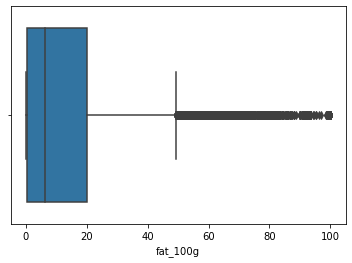

In [467]:
sns.boxplot(data=Indicateurs, x='fat_100g')

In [468]:
Indicateurs[Indicateurs['fat_100g']>80].head()

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
9,16513,Organic Sunflower Oil,en:united-states,unknown,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,35071,Organic Extra Virgin Olive Oil,en:united-states,unknown,3586.0,100.00,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,58247,Organic Unrefined Extra Virgin Coconut Oil,en:united-states,unknown,3586.0,100.00,85.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,111048403,100% Pure Canola Oil,en:united-states,unknown,3586.0,100.00,7.14,NaN,0.0,NaN,NaN,0.0,0.0,NaN,3768.120000,-182.120000
464,14373,Imported Olive Oil,en:united-states,unknown,3347.0,93.33,13.33,0.0,0.0,NaN,NaN,0.0,0.0,NaN,3516.786396,-169.786396


In [469]:
Indicateurs[(Indicateurs['fat_100g']>50) &(Indicateurs['fat_100g']<80)].head()

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
3,16087,Organic Salted Nut Mix,en:united-states,unknown,2540.0,57.14,5.36,NaN,17.86,3.57,7.1,17.86,0.482,12.0,2751.313752,-211.313752
16,18050,Organic Hazelnuts,en:united-states,unknown,2632.0,60.71,3.57,NaN,17.86,3.57,10.7,14.29,0.004,0.0,2826.048132,-194.048132
38,18630,Organic Coconut Chips,en:united-states,unknown,2761.0,65.00,57.00,NaN,24.00,7.00,16.0,6.00,0.037,14.0,2951.694000,-190.694000
83,34241,Organic White Sesame Seeds,en:united-states,unknown,2439.0,55.56,8.33,NaN,13.89,NaN,13.9,19.44,0.028,NaN,2651.751648,-212.751648
84,34265,Almonds Hickory-Smoked,en:united-states,unknown,2690.0,57.14,3.57,NaN,14.29,NaN,7.1,21.43,0.607,NaN,2751.313752,-61.313752


In [470]:
nuts=['nut', 'almond', 'cashew','Cajun', 'hazelnut','Mixed Nuts', 
      'mix', 'macadamia', 'pecan', 'pine nuts', 'pistachio', 'walnut', 
      'peanuts','Pecan', 'Nut Mix', 'pumpkin seed', 'flax seed', 'sesame', 'poppy seed', 'sunflower seed', 
      'psyllium seed', 'chia seed', 'kernel', 'seeds']
for n in nuts:
    Indicateurs.loc[(Indicateurs['fat_100g']>50)
                    &(Indicateurs['product_name'].str.contains(n, case=False)), 'pnns_groups_1']='Nuts and seeds'


In [471]:
Indicateurs[(Indicateurs['fat_100g']>50)]['pnns_groups_1'].value_counts()

unknown                           1477
Nuts and seeds                    1314
Fat and sauces                     706
Groceries                          280
Salty snacks                       233
Salted spreads                     107
Fish Meat Eggs                      87
Spreads                             79
Sugary snacks                       74
Fruits and vegetables               40
Plant based food and beverages      32
Cereals and potatoes                15
Canned foods                        11
Condiments                          10
Milk and dairy products              7
Appetizers                           4
Composite foods                      1
Snacks                               1
Breakfast cereals                    1
Spices                               1
Name: pnns_groups_1, dtype: int64

J'essaie de categoriser un peu plus les produits a forte contenance en matiere grasse

In [472]:
Acateg=Indicateurs[(Indicateurs['fat_100g']>50)&(Indicateurs['pnns_groups_1']=='unknown')]
Acateg.head(5)

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
9,16513,Organic Sunflower Oil,en:united-states,unknown,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,35071,Organic Extra Virgin Olive Oil,en:united-states,unknown,3586.0,100.00,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,111048403,100% Pure Canola Oil,en:united-states,unknown,3586.0,100.00,7.14,NaN,0.0,NaN,NaN,0.0,0.000,NaN,3768.120000,-182.120000
256,111301201,Original Buttery Spread,en:united-states,unknown,2690.0,71.43,10.71,0.0,0.0,0.0,0.0,0.0,0.714,25.0,2691.568116,-1.568116
257,111301263,"Buttery Spread, With Flaxseed Oil",en:united-states,unknown,2389.0,57.14,10.71,0.0,0.0,0.0,0.0,0.0,0.536,22.0,2153.103768,235.896232


### Les categories par nom de produit et taux de matiere grasse


In [473]:
spread=['spread', 'tartiner', 'peanut butter']
for s in spread:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(s, case=False)), 'pnns_groups_1']='Spreads'


In [474]:
oils=['Oil', 'Huile', 'Shortening', 'Butter', 'Beurre', 'Ghee', 'Lard', 'Tallow', 'Fat', "olive", 'coco', 'sauce', 'Marinade', 'canola'
    'Dressing', 'Aioli', 'Seasoning', 'salsa', 'tahini','Tahina ', 'Margarine', 'dip']
for o in oils:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(o, case=False)), 'pnns_groups_1']='Fat and sauces'


In [475]:
Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains('dressing', case=False)), 'pnns_groups_1']='Fat and sauces'


In [476]:
sugar=['chocolate', 'Truffles','Cacao', 'Cookies']
for s in sugar:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(s, case=False)), 'pnns_groups_1']='Sugary snacks'


In [477]:
condim=['Mayo', 'Vinaigrette','pesto','Balsamic','Mustard','Lemonaise']
for c in condim:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(c, case=False)), 'pnns_groups_1']='Condiments'


In [478]:
meat=['Bacon','Pork','Pepperoni','Sausage','meat']
for m in meat:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(m, case=False)), 'pnns_groups_1']='Fish Meat Eggs'


In [479]:
snack=['popcorn', 'pop corn','Pop Corn']
for s in snacks:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(s, case=False)), 'pnns_groups_1']='Salty snacks'

In [480]:
cheese=['cheese', 'cream', 'milk']
for c in cheese:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(c, case=False)), 'pnns_groups_1']='Milk and dairy products'

In [481]:
breakfast=['granola', 'flake', 'cereal']
for b in breakfast:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(b, case=False)), 'pnns_groups_1']='Breakfast cereals'

In [482]:
beverage=['Cappuccino']
for b in beverage:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['product_name'].str.contains(b, case=False)), 'pnns_groups_1']='Beverages'

#### Apres l'ajout des categories des matieres grasses:

In [483]:
Indicateurs[Indicateurs['fat_100g']>50]['pnns_groups_1'].value_counts()

Fat and sauces                    1472
Nuts and seeds                    1314
Groceries                          280
unknown                            263
Salty snacks                       243
Condiments                         216
Sugary snacks                      141
Fish Meat Eggs                     130
Salted spreads                     107
Spreads                            102
Milk and dairy products             98
Fruits and vegetables               40
Plant based food and beverages      32
Cereals and potatoes                15
Canned foods                        11
Breakfast cereals                    5
Beverages                            4
Appetizers                           4
Composite foods                      1
Snacks                               1
Spices                               1
Name: pnns_groups_1, dtype: int64

### Valeurs aberrantes dans la colonne saturated-fat_100g


In [484]:
Indicateurs['saturated-fat_100g'].describe()

count    176833.000000
mean          5.027036
std           7.537949
min           0.000000
25%           0.000000
50%           2.000000
75%           7.140000
max         175.380000
Name: saturated-fat_100g, dtype: float64

<AxesSubplot:xlabel='saturated-fat_100g'>

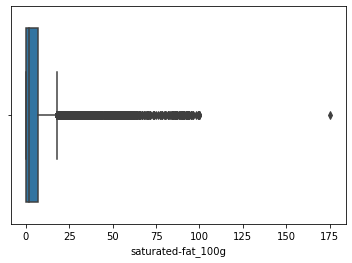

In [485]:
sns.boxplot(data=Indicateurs, x='saturated-fat_100g')

Je commence par eliminer les valeurs aberrates >100

In [486]:
Indicateurs.loc[Indicateurs['saturated-fat_100g']>100]

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
119389,626853108894,"Raw 100% Cacao, With Bits Of Delicate Dates",en:united-states,unknown,NaN,NaN,175.38,0.0,80.0,NaN,15.4,33.85,0.046,NaN,NaN,NaN


In [487]:
Indicateurs.drop(index=119389, inplace=True)

<AxesSubplot:xlabel='saturated-fat_100g'>

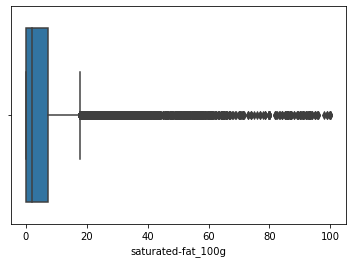

In [488]:
sns.boxplot(data=Indicateurs, x='saturated-fat_100g')

In [489]:
Indicateurs[Indicateurs['saturated-fat_100g']>50]['pnns_groups_1'].value_counts()

Fat and sauces             362
unknown                    165
Nuts and seeds              95
Fruits and vegetables       15
Sugary snacks                6
Salty snacks                 5
Milk and dairy products      5
Breakfast cereals            2
Cereals and potatoes         1
Groceries                    1
Beverages                    1
Spreads                      1
Salted spreads               1
Name: pnns_groups_1, dtype: int64

In [490]:
sat_fat=Indicateurs[Indicateurs['saturated-fat_100g']>50]

Il est normale d'avoir une grande valeur de saturated fat si la valeur de fat est egalement grande. Nous allons donc simplement regelrr le probleme si les valeurs des 2 variables de sont pas homogene (fat<saturated-fat)

In [491]:
Indicateurs.loc[(Indicateurs['saturated-fat_100g']>Indicateurs['fat_100g'])][['fat_100g', 'saturated-fat_100g']].describe()

,fat_100g,saturated-fat_100g
count,300.000000,300.00000
mean,6.197210,14.18431
std,10.719508,18.07712
min,0.000000,0.00100
25%,0.000000,1.00000
50%,1.760000,7.14000
75%,7.925000,20.00000
max,82.000000,98.00000


Pour ces valeurs je remplace la valeur saturated fat par fat

In [492]:
problem=Indicateurs.loc[(Indicateurs['saturated-fat_100g']>Indicateurs['fat_100g'])]['code']
Indicateurs.loc[Indicateurs['code'].isin(problem), 'saturated-fat_100g']=Indicateurs.loc[Indicateurs['code'].isin(problem), 'fat_100g']

In [493]:
Indicateurs['saturated-fat_100g'].describe()

count    176832.000000
mean          5.012523
std           7.493896
min           0.000000
25%           0.000000
50%           2.000000
75%           7.140000
max         100.000000
Name: saturated-fat_100g, dtype: float64

## Valeurs aberrantes dans 'cholesterol_100g'

In [494]:
Indicateurs['cholesterol_100g'].describe()

count    102046.000000
mean          0.019761
std           0.362628
min           0.000000
25%           0.000000
50%           0.000000
75%           0.023000
max          95.238000
Name: cholesterol_100g, dtype: float64

<AxesSubplot:xlabel='cholesterol_100g'>

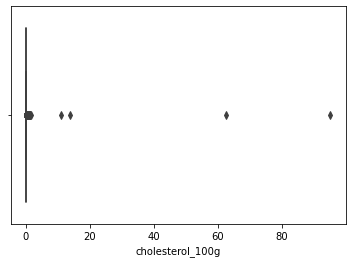

In [495]:
sns.boxplot(data=Indicateurs, x='cholesterol_100g')

Le cholesterol est normalement mesure en mg, les valeurs >1 sont probablement en mg au lieu de g, je les divise donc par 1000

In [496]:
Indicateurs.loc[Indicateurs['cholesterol_100g']>1,'cholesterol_100g']=Indicateurs.loc[Indicateurs['cholesterol_100g']>1,'cholesterol_100g']*0.001

<AxesSubplot:xlabel='cholesterol_100g'>

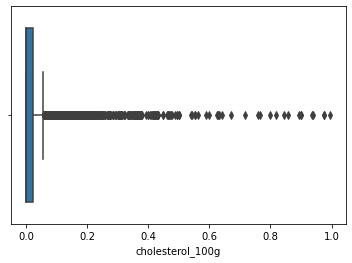

In [497]:
sns.boxplot(data=Indicateurs, x='cholesterol_100g')

## Valeurs aberrantes 'carbohydrates_100g'

In [498]:
Indicateurs['carbohydrates_100g'].describe()

count    178532.000000
mean         32.335959
std          27.897826
min           0.000000
25%           7.000000
50%          23.080000
75%          57.140000
max         100.000000
Name: carbohydrates_100g, dtype: float64

<AxesSubplot:xlabel='carbohydrates_100g'>

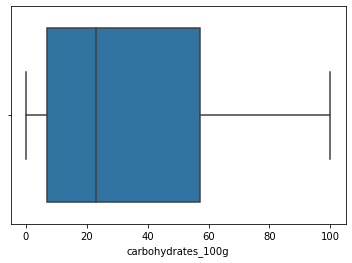

In [499]:
sns.boxplot(data=Indicateurs, x='carbohydrates_100g')

In [500]:
Indicateurs.loc[Indicateurs['carbohydrates_100g']>100,'carbohydrates_100g']=100

## Valeurs aberrantes 'sugars_100g'

In [501]:
Indicateurs['sugars_100g'].describe()

count    185529.000000
mean         15.612674
std          19.963270
min         -17.860000
25%           1.500000
50%           6.150000
75%          24.000000
max         134.000000
Name: sugars_100g, dtype: float64

<AxesSubplot:xlabel='sugars_100g'>

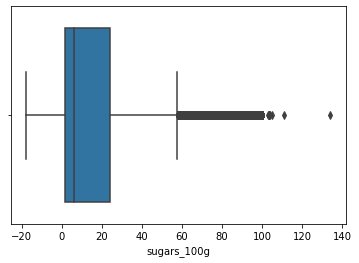

In [502]:
sns.boxplot(data=Indicateurs, x='sugars_100g')

In [503]:
Indicateurs.loc[Indicateurs['sugars_100g']<0, 'sugars_100g']=np.nan

In [504]:
Indicateurs.loc[Indicateurs['sugars_100g']>100]

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
111566,01364008,Tomato Ketchup,en:united-states,Groceries,2510.0,0.588,0.588,0.0,NaN,134.00,0.0,7.060,0.00417,17.0,NaN,NaN
133567,720118181216,Mango Jalapeno,en:united-states,unknown,1941.0,0.000,0.000,NaN,NaN,110.71,7.1,NaN,NaN,NaN,NaN,NaN
202571,3229820787909,Sirop d'Agave brun bio,en:france,Sweeteners,1760.0,0.000,0.000,NaN,100.0,104.00,0.0,0.000,0.05510,15.0,1674.720000,85.280000
239347,3560070740338,Sirop d'agave,en:france,Sugary snacks,1785.0,NaN,NaN,NaN,100.0,105.00,NaN,NaN,NaN,NaN,NaN,NaN
260598,4016249014940,Agave Syrup dark,en:germany,Sweeteners,1760.0,1.000,1.000,NaN,100.0,103.50,NaN,1.000,0.03937,15.0,1729.148400,30.851600
260599,4016249015732,Sirop d agave pur,en:france,Sweeteners,1760.0,1.000,0.100,NaN,100.0,103.50,NaN,1.000,0.03937,15.0,1729.148400,30.851600
260611,4016249696122,Agavendicksaft,en:germany,Sweeteners,1760.0,1.000,0.100,NaN,100.0,103.50,NaN,1.000,0.03937,15.0,1729.148400,30.851600
265110,4305615359281,Agavendicksaft Dunkel,en:germany,Sweeteners,1756.0,0.100,0.000,NaN,100.0,103.00,0.1,0.013,NaN,NaN,1678.705834,77.294166


In [505]:
pb=['01364008', '720118181216', '840228113270']
Indicateurs.loc[Indicateurs['code'].isin(pb),'sugars_100g']=np.nan

In [506]:
Indicateurs.loc[Indicateurs['sugars_100g']>100,'sugars_100g']=100

Les produits avec 100g de sucre sont du sucre ou des bonbons, on leur ajoute conc a leur categorie

In [509]:
Indicateurs.loc[Indicateurs['sugars_100g']==100].head()

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
36,18562,"Sweeteners, Demerara Turbinado Sugar",en:united-states,Sugary snacks,1569.0,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
399,790900115,Tnt Exploding Candy,en:united-states,Sugary snacks,1393.0,0.0,0.0,NaN,100.0,100.0,NaN,0.0,0.0,14.0,1674.72,-281.72
2905,11110701794,"Dessert Topping, Red Sugar",en:united-states,Sugary snacks,1569.0,0.0,NaN,NaN,100.0,100.0,NaN,0.0,0.0,NaN,1674.72,-105.72
2906,11110701800,Green Sugar Dessert Toppings,en:united-states,Sugary snacks,1569.0,0.0,NaN,NaN,100.0,100.0,NaN,0.0,0.0,NaN,1674.72,-105.72
3217,11110803122,Zero Calorie Sweetener,en:united-states,Sugary snacks,0.0,0.0,0.0,0.0,NaN,100.0,0.0,0.0,0.0,10.0,NaN,NaN


In [510]:
Indicateurs.loc[(Indicateurs['sugars_100g']==100)& (Indicateurs['pnns_groups_1']=='unknown'), 'pnns_groups_1']='Sugary snacks'

## Valeurs aberrantes 'fiber_100g'

In [511]:
Indicateurs['fiber_100g'].describe()

count    154560.000000
mean          2.858706
std           4.643587
min          -6.700000
25%           0.000000
50%           1.500000
75%           3.600000
max         178.000000
Name: fiber_100g, dtype: float64

<AxesSubplot:xlabel='fiber_100g'>

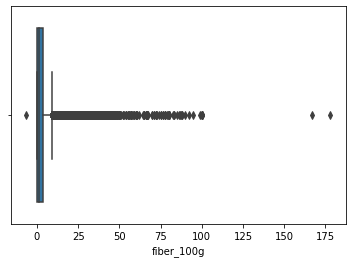

In [512]:
sns.boxplot(data=Indicateurs, x='fiber_100g')

In [513]:
Indicateurs.loc[Indicateurs['fiber_100g']<0, 'fiber_100g']=np.nan

La famille haricot sont els plus riche en fibre je garde donc la valeur maximum qu'ils peuvent avoir et considere les autres comme valeurs aberrantes

In [514]:
Indicateurs.loc[Indicateurs['fiber_100g']>50,'fiber_100g']=np.nan

<AxesSubplot:xlabel='fiber_100g'>

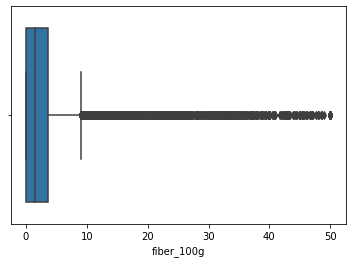

In [515]:
sns.boxplot(data=Indicateurs, x='fiber_100g')

## 'proteins_100g'

In [516]:
Indicateurs['proteins_100g'].describe()

count    193305.000000
mean          7.268086
std           7.937493
min           0.000000
25%           1.270000
50%           5.200000
75%          10.000000
max         100.000000
Name: proteins_100g, dtype: float64

<AxesSubplot:xlabel='proteins_100g'>

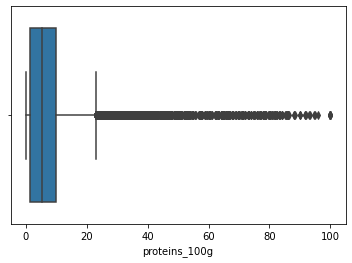

In [517]:
sns.boxplot(data=Indicateurs, x='proteins_100g')

Les produits a tres forte contenance en protein sont souvent les supplements alimentaires proteinee

In [518]:
Indicateurs.loc[(Indicateurs['proteins_100g']>50) & (Indicateurs['pnns_groups_1']=='unknown')].head(2)

,code,product_name,countries_tags,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,energie-calculee,difference
246,105000073,"Herbal Tea, Hibiscus",en:united-states,unknown,2121.367824,0.0,NaN,NaN,60.0,NaN,NaN,66.67,0.133,NaN,2121.367824,0.0
247,105000196,Apple & Cinnamon Tea,en:united-states,unknown,2121.367824,0.0,NaN,NaN,60.0,NaN,NaN,66.67,0.133,NaN,2121.367824,0.0


In [519]:
protein=['Protein','egg white','Whey','Protéine','Spiruline','iso','bcaa','gelatin','OGGI','Yeast']
for p in protein:
    Indicateurs.loc[(Indicateurs['proteins_100g']>50) & (Indicateurs['product_name'].str.contains(p, case=False)), 'pnns_groups_1']='Dietary supplements'

In [520]:
meat=['pork','Beef','Shrimp']
for m in meat:
    Indicateurs.loc[(Indicateurs['pnns_groups_1']=='unknown')&(Indicateurs['product_name'].str.contains(m, case=False)), 'pnns_groups_1']='Fish Meat Eggs'

In [521]:
beverage=['Tea']
for b in beverage:
    Indicateurs.loc[(Indicateurs['pnns_groups_1']=='unknown')&(Indicateurs['product_name'].str.contains(b, case=False)), 'pnns_groups_1']='Beverages'

### Les categories apres netoyage
Je regarde les categories minoritaires qui ne doivent normalement pas etre a haute contenance en proteine

In [522]:
proteinIndic=Indicateurs[Indicateurs['proteins_100g']>50]
proteinIndic['pnns_groups_1'].value_counts()

Dietary supplements               161
unknown                           101
Fish Meat Eggs                     96
Beverages                           6
Sugary snacks                       5
Plant based food and beverages      4
Milk and dairy products             2
Condiments                          2
Groceries                           1
Salty snacks                        1
Name: pnns_groups_1, dtype: int64

In [523]:
Indicateurs.shape

(196216, 16)

In [524]:
Indicateurs.drop(Indicateurs[Indicateurs['code']=='9230000011527'].index, axis=0, inplace=True) #produit non alimentaire

## sodium_100g

In [525]:
Indicateurs['sodium_100g'].describe()

count    190317.000000
mean          0.833241
std          58.468489
min           0.000000
25%           0.039370
50%           0.257000
75%           0.551181
max       25320.000000
Name: sodium_100g, dtype: float64

<AxesSubplot:xlabel='sodium_100g'>

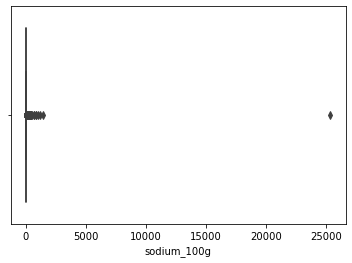

In [526]:
sns.boxplot(data=Indicateurs, x='sodium_100g')

In [527]:
Indicateurs.loc[Indicateurs['sodium_100g']>100, 'sodium_100g']=np.nan

<AxesSubplot:xlabel='sodium_100g'>

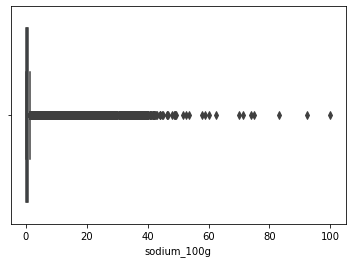

In [528]:
sns.boxplot(data=Indicateurs, x='sodium_100g')

In [529]:
Acateg=Indicateurs.loc[Indicateurs['sodium_100g']>60]

### Categorisation a partir du taux de sodium
#### Salts

In [530]:
salt=['salt', 'sel','Baking Soda','Sea s']
for s in salt:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['code'].str.contains(s, case=False)),'pnns_groups_1']='Salts'

#### Condiments

In [531]:
condim=['Season', 'Bouillon','Boil','spice','cube','broth','pepper','pickle']
for c in condim:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['code'].str.contains(c, case=False)),'pnns_groups_1']='Condiments'

#### Fish Meat Eggs

In [532]:
meat=['meat', 'beef','Boil','ham','marinad','chicken']
for m in meat:
    Indicateurs.loc[(Indicateurs['code'].isin(Acateg['code'])) & (Indicateurs['code'].str.contains(m, case=False)),'pnns_groups_1']='Fish Meat Eggs'

## nutrition-score-fr_100g


In [533]:
Indicateurs['nutrition-score-fr_100g'].describe()

count    171612.000000
mean          9.311546
std           8.924468
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

<AxesSubplot:xlabel='nutrition-score-fr_100g'>

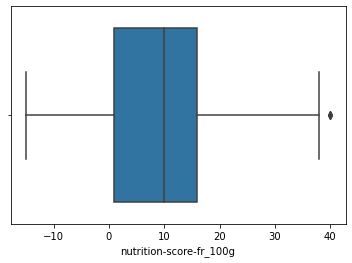

In [534]:
sns.boxplot(data=Indicateurs, x='nutrition-score-fr_100g')

Pas de valeurs aberrantes pour cette variable

In [535]:
grains=[ 'wheat', 'oats', 'rice', 'corn', 'maize', 'barley', 'sorghum', 'rye', 'millet','farro', 'freekeh', 'emmer', 'spelt','amaranth', 'buckwheat' ,'quinoa']
for w in grains:
    Indicateurs.loc[(Indicateurs['pnns_groups_1']=='unknown') & (Indicateurs['product_name'].str.contains(w, case=False)), 'pnns_groups_1']="Cereal and Grains"

fruits=['apples', 'arugula', 'asparagus', 'artichoke', 'avocado','bananas', 'blueberries', 'broccoli', 
        'carrots', 'celery', 'cherries', 'cauliflower','radish','eggplant', 'endive', 'figs', 'grapes', 'grapefruit', 
        'guava', 'ginger', 'melon','lettuce', 'jicama', 'kale','kiwi', 'lemons','mushrooms', 'melon', 'mangos', 'nectarines',
        'oranges', 'onions', 'okra', 'peas', 'peppers', 'pineapple', 'pears', 'peaches','quince', 'raisins', 'raspberries', 
        'spinach', 'squash', 'sprouts', 'strawberries','tangerine', 'tropical fruit', 'turnips', 'tomatillos', 'tomatoes', 
        'watermelon', 'watercress', 'plums', 'zucchini']
for f in fruits:
    Indicateurs.loc[(Indicateurs['pnns_groups_1']=='unknown') & (Indicateurs['product_name'].str.contains(f, case=False)), 'pnns_groups_1']="Fruits and vegetables"
sweet=['chocolat','biscuit', 'cookies', 'ice cream', 'candy', 'glace','bonbon' ]
for s in sweet:
    Indicateurs.loc[(Indicateurs['pnns_groups_1']=='unknown') & (Indicateurs['product_name'].str.contains(s, case=False)),'pnns_groups_1']='Sugary snacks'

# Resume sur le dataset Indicateurs

In [536]:
Indicateurs=Indicateurs.drop(columns=['energie-calculee','difference'])

In [537]:
Indicateurs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,194965.0,1128.011566,757.756368,0.0,420.00000,1096.000,1674.000000,6001.191648
fat_100g,178015.0,12.488743,15.531234,0.0,0.50000,6.430,20.000000,100.000000
saturated-fat_100g,176831.0,5.011991,7.490584,0.0,0.00000,2.000,7.140000,100.000000
cholesterol_100g,102046.0,0.017923,0.035965,0.0,0.00000,0.000,0.023000,0.996000
carbohydrates_100g,178532.0,32.335959,27.897826,0.0,7.00000,23.080,57.140000,100.000000
sugars_100g,185520.0,15.612689,19.960627,0.0,1.50000,6.150,24.000000,100.000000
fiber_100g,154463.0,2.815275,4.271938,0.0,0.00000,1.500,3.600000,50.000000
proteins_100g,193304.0,7.267668,7.935390,0.0,1.27000,5.200,10.000000,100.000000
sodium_100g,190287.0,0.635242,2.390443,0.0,0.03937,0.257,0.551181,100.000000
nutrition-score-fr_100g,171612.0,9.311546,8.924468,-15.0,1.00000,10.000,16.000000,40.000000


In [538]:
Indicateurs.shape

(196215, 14)

In [539]:
Indicateurs.isna().mean()

code                       0.000000
product_name               0.000000
countries_tags             0.000311
pnns_groups_1              0.000000
energy_100g                0.006371
fat_100g                   0.092755
saturated-fat_100g         0.098790
cholesterol_100g           0.479928
carbohydrates_100g         0.090121
sugars_100g                0.054507
fiber_100g                 0.212787
proteins_100g              0.014836
sodium_100g                0.030212
nutrition-score-fr_100g    0.125388
dtype: float64

In [540]:
Indicateurs.dropna(thresh=7, inplace=True)

In [541]:
Indicateurs.shape

(195215, 14)

In [542]:
Indicateurs.corr().style.background_gradient()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.780796,0.575730,0.045337,0.578577,0.354977,0.312890,0.298186,-0.072916,0.645861
fat_100g,0.780796,1.000000,0.722929,0.194264,-0.025721,0.003161,0.162658,0.260550,-0.049477,0.586063
saturated-fat_100g,0.575730,0.722929,1.000000,0.317502,0.006367,0.148815,0.019804,0.146597,-0.028969,0.630860
cholesterol_100g,0.045337,0.194264,0.317502,1.000000,-0.290928,-0.126701,-0.227837,0.368229,0.010180,0.250918
carbohydrates_100g,0.578577,-0.025721,0.006367,-0.290928,1.000000,0.659704,0.276246,-0.096389,-0.069440,0.307500
sugars_100g,0.354977,0.003161,0.148815,-0.126701,0.659704,1.000000,-0.002263,-0.251789,-0.084559,0.488603
fiber_100g,0.312890,0.162658,0.019804,-0.227837,0.276246,-0.002263,1.000000,0.247921,-0.018928,-0.133279
proteins_100g,0.298186,0.260550,0.146597,0.368229,-0.096389,-0.251789,0.247921,1.000000,0.005633,0.092228
sodium_100g,-0.072916,-0.049477,-0.028969,0.010180,-0.069440,-0.084559,-0.018928,0.005633,1.000000,0.114238
nutrition-score-fr_100g,0.645861,0.586063,0.630860,0.250918,0.307500,0.488603,-0.133279,0.092228,0.114238,1.000000


In [543]:
Indicateurs['pnns_groups_1'].value_counts()

unknown                           100805
Sugary snacks                      25568
Fruits and vegetables               9904
Fish Meat Eggs                      8279
Cereal and Grains                   7614
Beverages                           7518
Milk and dairy products             6311
Composite foods                     4726
Cereals and potatoes                3616
Salty snacks                        2347
Groceries                           2182
Plant based food and beverages      2174
Canned foods                        1897
Desserts                            1844
Fat and sauces                      1716
Frozen food                         1687
Breakfast cereals                   1568
Nuts and seeds                      1313
Salted spreads                       877
Condiments                           708
Baby food                            520
Appetizers                           496
Pizza pies and quiche                427
Spreads                              401
Dietary suppleme

<AxesSubplot:>

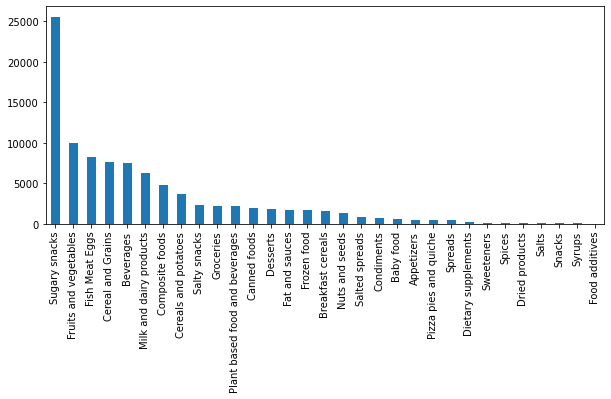

In [544]:
categ=Indicateurs['pnns_groups_1'].value_counts()
categ=categ[categ<30000]
categ.plot(kind='bar', figsize=(10,4))

## Conclusion
On voit bien apres netoyage que les correlations entre les differentes valeurs sont plus claires. Je garde une coie de ce dataset afin d'eviter de refaire le travail de netoyage

In [545]:
Indicateurs.to_csv('Indicateurs.csv', index=False)

In [546]:
Indicateurs=pd.read_csv('Indicateurs.csv', sep=',')

In [547]:
Indicateurs.shape

(195215, 14)

# Imputations
Nous allons essayer de remplacer les vaelurs manquantes en utilisant 2 methodes. La premiere methode est la methode de iterative computing et la seconde est la methode knn. Avant l'imputation nous allons faire un split de notre dataset qui nous servira pour la validation des resultats 

In [548]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor



In [549]:
X_train, X_test = train_test_split(Indicateurs, test_size=0.2, random_state=42)

In [550]:
X_train.shape

(156172, 14)

In [551]:
X_test.shape

(39043, 14)

In [553]:
X_train.corr().style.background_gradient()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.780967,0.576412,0.046049,0.577962,0.355645,0.313685,0.299094,-0.074240,0.646383
fat_100g,0.780967,1.000000,0.722474,0.197221,-0.026303,0.004994,0.161968,0.260695,-0.050544,0.587066
saturated-fat_100g,0.576412,0.722474,1.000000,0.322756,0.006888,0.150629,0.018665,0.145312,-0.029645,0.633538
cholesterol_100g,0.046049,0.197221,0.322756,1.000000,-0.292256,-0.126401,-0.230325,0.365085,0.009060,0.254973
carbohydrates_100g,0.577962,-0.026303,0.006888,-0.292256,1.000000,0.658391,0.277497,-0.095704,-0.070041,0.307173
sugars_100g,0.355645,0.004994,0.150629,-0.126401,0.658391,1.000000,-0.000924,-0.252048,-0.084379,0.488603
fiber_100g,0.313685,0.161968,0.018665,-0.230325,0.277497,-0.000924,1.000000,0.247541,-0.019788,-0.133106
proteins_100g,0.299094,0.260695,0.145312,0.365085,-0.095704,-0.252048,0.247541,1.000000,0.005749,0.092478
sodium_100g,-0.074240,-0.050544,-0.029645,0.009060,-0.070041,-0.084379,-0.019788,0.005749,1.000000,0.113909
nutrition-score-fr_100g,0.646383,0.587066,0.633538,0.254973,0.307173,0.488603,-0.133106,0.092478,0.113909,1.000000


In [554]:
X_test.corr().style.background_gradient()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.780098,0.573007,0.042814,0.581042,0.352318,0.309744,0.294528,-0.067544,0.643769
fat_100g,0.780098,1.000000,0.724759,0.183592,-0.023395,-0.004108,0.165435,0.259934,-0.045179,0.582036
saturated-fat_100g,0.573007,0.724759,1.000000,0.298757,0.004255,0.141707,0.024270,0.151719,-0.026329,0.620381
cholesterol_100g,0.042814,0.183592,0.298757,1.000000,-0.286131,-0.128255,-0.219294,0.381016,0.014186,0.237505
carbohydrates_100g,0.581042,-0.023395,0.004255,-0.286131,1.000000,0.664943,0.271273,-0.099164,-0.067022,0.308806
sugars_100g,0.352318,-0.004108,0.141707,-0.128255,0.664943,1.000000,-0.007578,-0.250765,-0.085273,0.488614
fiber_100g,0.309744,0.165435,0.024270,-0.219294,0.271273,-0.007578,1.000000,0.249446,-0.015602,-0.133982
proteins_100g,0.294528,0.259934,0.151719,0.381016,-0.099164,-0.250765,0.249446,1.000000,0.005150,0.091201
sodium_100g,-0.067544,-0.045179,-0.026329,0.014186,-0.067022,-0.085273,-0.015602,0.005150,1.000000,0.115544
nutrition-score-fr_100g,0.643769,0.582036,0.620381,0.237505,0.308806,0.488614,-0.133982,0.091201,0.115544,1.000000


Les relations statistiques dans les 2 datasets sont similaires

## Iterative imputer
Pour cette methode, les variables doivent avoir des valeurs numerique et doivent etre correle. Je fais une imputation sur les valeurs numeriques du dataset excepte le cholesterol et sodium qui sont faiblemnt correles avec les autres indicateurs

### Imputation sur le dataset complet

In [555]:
all_num=X_train.dtypes
all_num=all_num[all_num=='float64'].index
all_num

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [556]:
corrnum=['energy_100g', 'fat_100g', 'saturated-fat_100g', 
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
        'nutrition-score-fr_100g']

In [557]:
data=X_train[corrnum]
data.shape

(156172, 8)

In [558]:
imp = IterativeImputer(max_iter=15, random_state=0)
imp.fit(data)
datana=imp.transform(data)

In [559]:
datana.shape

(156172, 8)

In [560]:
data_df = pd.DataFrame(datana, columns = corrnum)
data_df.isna().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
nutrition-score-fr_100g    0
dtype: int64

In [561]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,156172.0,1129.437597,757.865485,0.000000,423.000000,1100.00,1674.00,5128.830000
fat_100g,156172.0,12.504407,15.108941,-24.793716,0.770000,7.00,20.00,103.562988
saturated-fat_100g,156172.0,4.719132,7.266025,-13.449631,0.000000,1.79,6.67,100.000000
carbohydrates_100g,156172.0,32.194666,28.074399,-116.632024,6.780000,23.00,57.14,142.438933
sugars_100g,156172.0,15.289146,19.723701,-57.635264,1.500000,6.00,23.60,100.000000
fiber_100g,156172.0,2.566674,3.916276,-11.151473,0.000000,1.50,3.40,50.000000
proteins_100g,156172.0,7.271051,7.947205,-100.268801,1.297979,5.26,10.00,100.000000
nutrition-score-fr_100g,156172.0,9.065206,8.799328,-33.933867,1.497078,9.00,16.00,70.627205


In [567]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,155618.0,1129.310812,757.788131,0.0,423.00000,1100.000,1674.000000,5128.830
fat_100g,142342.0,12.491295,15.520257,0.0,0.50000,6.400,20.000000,100.000
saturated-fat_100g,141437.0,5.019219,7.485557,0.0,0.00000,2.000,7.140000,100.000
cholesterol_100g,81729.0,0.017850,0.035494,0.0,0.00000,0.000,0.023000,0.975
carbohydrates_100g,142765.0,32.354439,27.894113,0.0,7.00000,23.080,57.140000,100.000
sugars_100g,148356.0,15.610233,19.937635,0.0,1.50000,6.200,24.000000,100.000
fiber_100g,123546.0,2.814450,4.266660,0.0,0.00000,1.500,3.600000,50.000
proteins_100g,154637.0,7.274192,7.937764,0.0,1.27000,5.200,10.000000,100.000
sodium_100g,152110.0,0.634868,2.378554,0.0,0.03937,0.257,0.551181,100.000
nutrition-score-fr_100g,137215.0,9.322253,8.928824,-15.0,1.00000,10.000,16.000000,40.000


Cette fonction ne preserve pas les statistiques du dataset initial, on voit des valeurs minimles negatives et des valeurs maximale superieurs au maxima initiaux

In [568]:
qual=X_train[['code', 'product_name','pnns_groups_1']]
qual.shape

(156172, 3)

In [569]:
iterdata=qual.join(data_df)

In [570]:
iterdata.to_csv('Iterative Imputer methode.csv', index=False)

## Knn Imputer
Cette methode necessite un plus long temps de calcul mais est utile pour les variables non-correlee ou faiblement correle avec les autres tel le cholesterol ou sodium

## Fit Transform du training set

In [571]:
data = X_train[all_num]
imputer = KNNImputer(n_neighbors=3)
imputer.fit(data)

KNNImputer(n_neighbors=3)

In [572]:
datacomp_new=imputer.transform(data) 

In [573]:
datacomp_new_df= pd.DataFrame(datacomp_new, columns = all_num)
datacomp_new_df.head(2)

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
0,130.0,0.00,0.0,0.0,6.25,6.25,0.0,0.00,0.844,10.0
1,1481.0,1.04,0.0,0.0,62.50,2.08,14.6,20.83,0.010,-6.0


In [574]:
datacomp_new.shape

(156172, 10)

In [575]:
datacomp_new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,156172.0,1128.407124,757.406002,0.0,423.000000,1096.000000,1674.000000,5128.830
fat_100g,156172.0,12.079542,15.148028,0.0,0.400000,6.033333,19.782500,100.000
saturated-fat_100g,156172.0,4.709497,7.331436,0.0,0.000000,1.670000,6.700000,100.000
cholesterol_100g,156172.0,0.017893,0.034201,0.0,0.000000,0.000000,0.022667,0.975
carbohydrates_100g,156172.0,32.292647,27.337301,0.0,7.220000,24.000000,56.670000,100.000
sugars_100g,156172.0,15.317435,19.744705,0.0,1.333333,5.910000,23.500000,100.000
fiber_100g,156172.0,2.676220,4.267310,0.0,0.000000,1.200000,3.500000,50.000
proteins_100g,156172.0,7.269490,7.941661,0.0,1.220000,5.200000,10.000000,100.000
sodium_100g,156172.0,0.637790,2.357768,0.0,0.039370,0.259843,0.551181,100.000
nutrition-score-fr_100g,156172.0,9.414048,8.775288,-15.0,2.000000,10.000000,16.000000,40.000


In [576]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,155618.0,1129.310812,757.788131,0.0,423.00000,1100.000,1674.000000,5128.830
fat_100g,142342.0,12.491295,15.520257,0.0,0.50000,6.400,20.000000,100.000
saturated-fat_100g,141437.0,5.019219,7.485557,0.0,0.00000,2.000,7.140000,100.000
cholesterol_100g,81729.0,0.017850,0.035494,0.0,0.00000,0.000,0.023000,0.975
carbohydrates_100g,142765.0,32.354439,27.894113,0.0,7.00000,23.080,57.140000,100.000
sugars_100g,148356.0,15.610233,19.937635,0.0,1.50000,6.200,24.000000,100.000
fiber_100g,123546.0,2.814450,4.266660,0.0,0.00000,1.500,3.600000,50.000
proteins_100g,154637.0,7.274192,7.937764,0.0,1.27000,5.200,10.000000,100.000
sodium_100g,152110.0,0.634868,2.378554,0.0,0.03937,0.257,0.551181,100.000
nutrition-score-fr_100g,137215.0,9.322253,8.928824,-15.0,1.00000,10.000,16.000000,40.000


In [593]:
datacomp_new_df.corr().style.background_gradient()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.728191,0.572962,0.089558,0.543057,0.344917,0.277299,0.296866,-0.073813,0.626481
fat_100g,0.728191,1.000000,0.658301,0.241905,-0.034846,-0.006459,0.121554,0.242910,-0.043068,0.532043
saturated-fat_100g,0.572962,0.658301,1.000000,0.306196,0.009943,0.115100,0.003629,0.172475,-0.042277,0.610809
cholesterol_100g,0.089558,0.241905,0.306196,1.000000,-0.246152,-0.151464,-0.130761,0.362283,-0.000115,0.221886
carbohydrates_100g,0.543057,-0.034846,0.009943,-0.246152,1.000000,0.607083,0.231437,-0.089943,-0.069570,0.282655
sugars_100g,0.344917,-0.006459,0.115100,-0.151464,0.607083,1.000000,-0.021825,-0.248005,-0.093882,0.472238
fiber_100g,0.277299,0.121554,0.003629,-0.130761,0.231437,-0.021825,1.000000,0.230078,-0.025654,-0.119307
proteins_100g,0.296866,0.242910,0.172475,0.362283,-0.089943,-0.248005,0.230078,1.000000,0.006149,0.094971
sodium_100g,-0.073813,-0.043068,-0.042277,-0.000115,-0.069570,-0.093882,-0.025654,0.006149,1.000000,0.098788
nutrition-score-fr_100g,0.626481,0.532043,0.610809,0.221886,0.282655,0.472238,-0.119307,0.094971,0.098788,1.000000


Les resultats semblent plus realistes dans le cas d'une imputation par knn que dans le cas d'une imputation interative imputer

In [578]:
qual=X_train[['code', 'product_name',  'pnns_groups_1']]

In [579]:
qual.reset_index(inplace=True)

In [580]:
knndata=qual.join(datacomp_new_df)

In [581]:
knndata.isna().sum()

index                      0
code                       0
product_name               0
pnns_groups_1              0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
cholesterol_100g           0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [582]:
knndata.drop(columns=['index'], inplace=True)

In [583]:
knndata.to_csv('Knn_train.csv', index=False)

## Tranform du testing set
Pour le test set je fait un transform sans faire de fit pour reduire la correlation entre les resultats

In [584]:
data_test = X_test[all_num]
data_test_impute=imputer.transform(data_test) 

In [585]:
data_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,38899.0,1124.683490,756.126886,0.0,418.00000,1088.000,1674.000000,6001.191648
fat_100g,35509.0,12.383270,15.431559,0.0,0.50000,6.430,20.000000,100.000000
saturated-fat_100g,35389.0,4.983343,7.510934,0.0,0.00000,2.000,7.070000,100.000000
cholesterol_100g,20315.0,0.018218,0.037800,0.0,0.00000,0.000,0.023000,0.996000
carbohydrates_100g,35650.0,32.275782,27.896494,0.0,7.00000,23.080,57.140000,100.000000
sugars_100g,37121.0,15.591373,20.021175,0.0,1.50000,6.000,23.760000,100.000000
fiber_100g,30914.0,2.818752,4.293195,0.0,0.00000,1.500,3.600000,50.000000
proteins_100g,38639.0,7.240988,7.927235,0.0,1.25000,5.130,10.000000,100.000000
sodium_100g,37999.0,0.624532,2.337309,0.0,0.03937,0.257,0.551181,92.500000
nutrition-score-fr_100g,34370.0,9.277015,8.905430,-14.0,1.00000,10.000,16.000000,40.000000


In [586]:
data_test_impute_df= pd.DataFrame(data_test_impute, columns = all_num)
data_test_impute_df.shape

(39043, 10)

In [587]:
data_test_impute_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_100g,39043.0,1123.535035,755.934656,0.0,418.00000,1084.000,1674.000000,6001.191648
fat_100g,39043.0,11.971055,15.058317,0.0,0.40000,6.030,19.283333,100.000000
saturated-fat_100g,39043.0,4.684528,7.349806,0.0,0.00000,1.670,6.670000,100.000000
cholesterol_100g,39043.0,0.018218,0.035755,0.0,0.00000,0.000,0.023300,0.996000
carbohydrates_100g,39043.0,32.193951,27.329565,0.0,7.14000,24.000,56.140000,100.000000
sugars_100g,39043.0,15.312767,19.825713,0.0,1.30000,5.830,23.330000,100.000000
fiber_100g,39043.0,2.681067,4.279887,0.0,0.00000,1.200,3.500000,50.000000
proteins_100g,39043.0,7.239463,7.931748,0.0,1.22000,5.130,10.000000,100.000000
sodium_100g,39043.0,0.626700,2.316339,0.0,0.03937,0.259,0.551181,92.500000
nutrition-score-fr_100g,39043.0,9.369900,8.755494,-14.0,2.00000,10.000,16.000000,40.000000


In [588]:
qual=X_test[['code', 'product_name', 'pnns_groups_1']]
qual.shape

(39043, 3)

In [589]:
qual.reset_index(inplace=True)

In [590]:
knndata_test=qual.join(data_test_impute_df)
knndata_test.drop(columns=['index'], inplace=True)

In [591]:
knndata_test.to_csv('Knn_test.csv', index=False)